<h2>Time Series Forecasting - Part 1: Sparkling.csv</h2><br>
<h3>Shubhadeep Bhattacharya<br>
Batch: DSBA - Oct 2019<br></h3>

<h2>Part 1 - Wine Sales analysis and forecasting for Sparkling.csv</h2>

In [2]:
# importing the essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
import warnings
warnings.filterwarnings('ignore')

<h3>Question 1. Read the data as an appropriate Time Series data and plot the data.</h3>

In [4]:
# reading the data in the form of a time series
sparkling_data = pd.read_csv('Sparkling.csv', parse_dates=True, index_col=0)

In [5]:
sparkling_data.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Note: The date index assigned is the beginning of each month (format: MS)

In [6]:
sparkling_data.rename(columns={"Sparkling": "Sparkling_Sales"}, inplace=True)

In [7]:
sparkling_data.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [8]:
sparkling_data.columns

Index(['Sparkling_Sales'], dtype='object')

In [9]:
sparkling_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sparkling_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


Note: Sparkling Sales observations for 187 months (15 years and 7 months), from Jan 1980 to July 1995. No missing values.

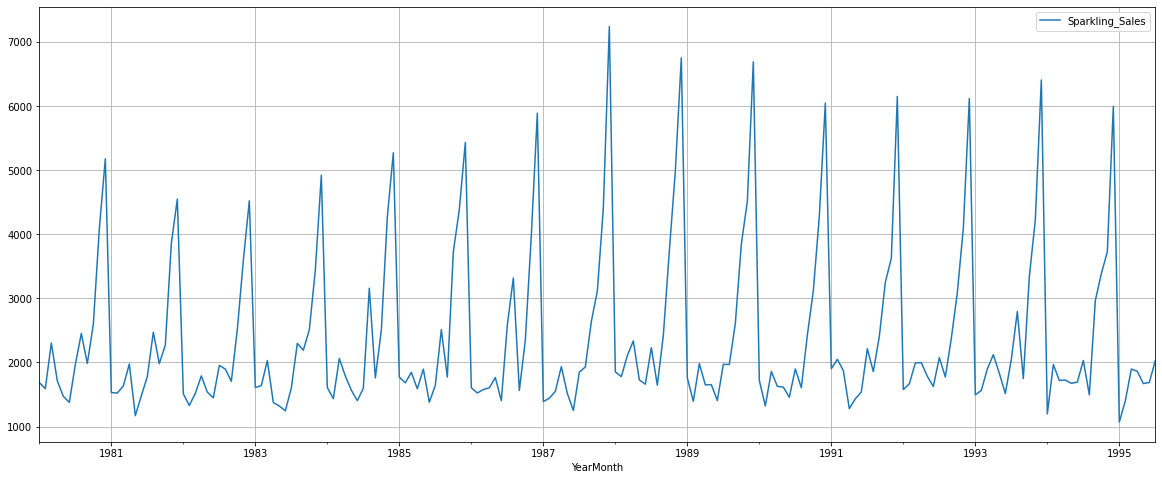

In [10]:
# plotting the entire data set
sparkling_data.plot(figsize=(20,8))
plt.grid()

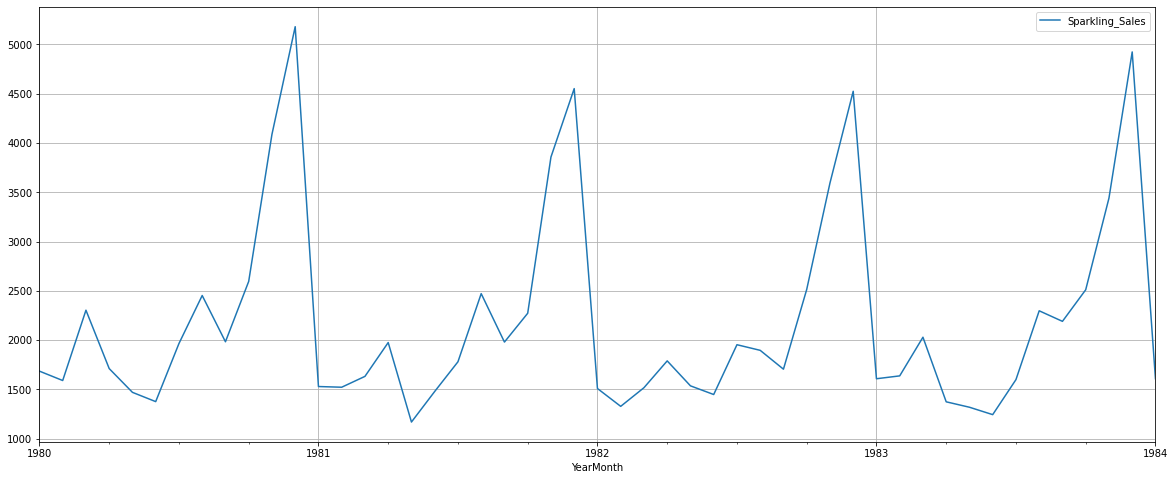

In [11]:
# plotting the first 4 year data to observe the seasonal aspects
sparkling_data[:49].plot(figsize=(20,8))
plt.grid()

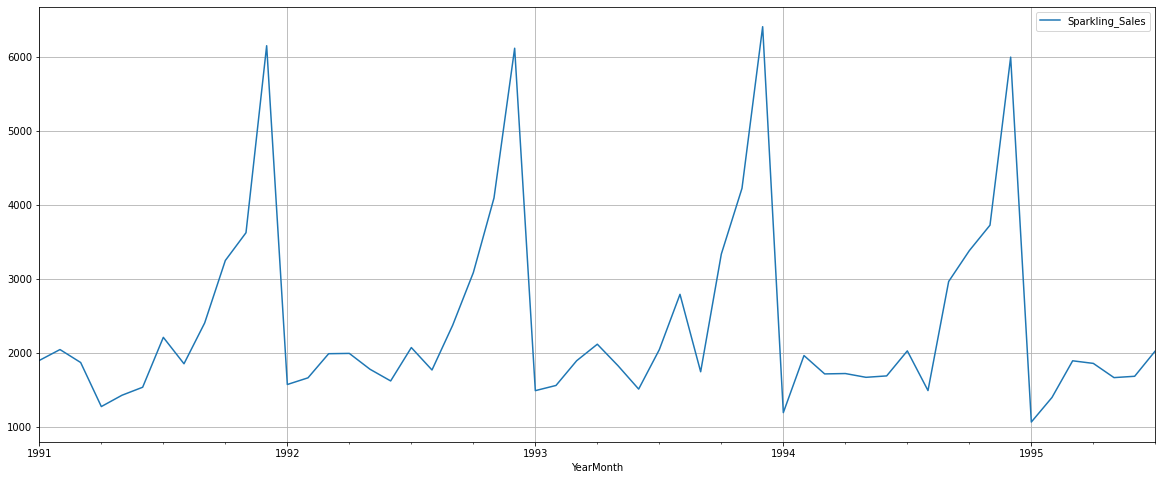

In [353]:
# plotting the first 4 year data to observe the seasonal aspects
sparkling_data[132:].plot(figsize=(20,8))
plt.grid()


<h3>Question 2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.</h3>

In [12]:
sparkling_data.head()

Sparkling_Sales
YearMonth                  
1980-01-01             1686
1980-02-01             1591
1980-03-01             2304
1980-04-01             1712
1980-05-01             1471

In [13]:
sparkling_data.tail()

Sparkling_Sales
YearMonth                  
1995-03-01             1897
1995-04-01             1862
1995-05-01             1670
1995-06-01             1688
1995-07-01             2031

In [358]:
sparkling_data.describe()

Sparkling_Sales
count       187.000000
mean       2402.417112
std        1295.111540
min        1070.000000
25%        1605.000000
50%        1874.000000
75%        2549.000000
max        7242.000000

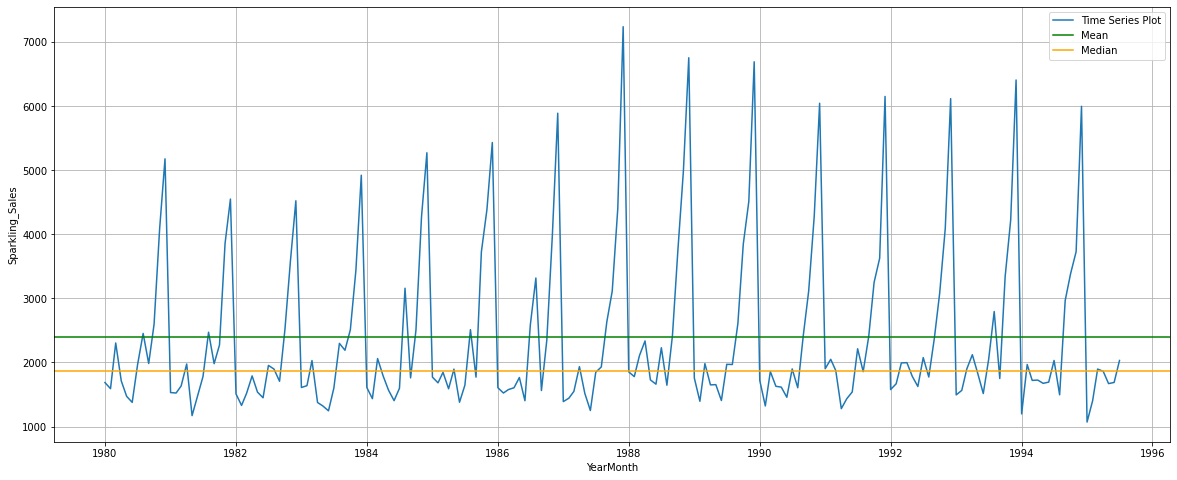

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(x= sparkling_data.index, y = sparkling_data['Sparkling_Sales'])
plt.axhline(sparkling_data['Sparkling_Sales'].mean(),color='Green')
plt.axhline(sparkling_data['Sparkling_Sales'].median(),color='Orange')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median'])

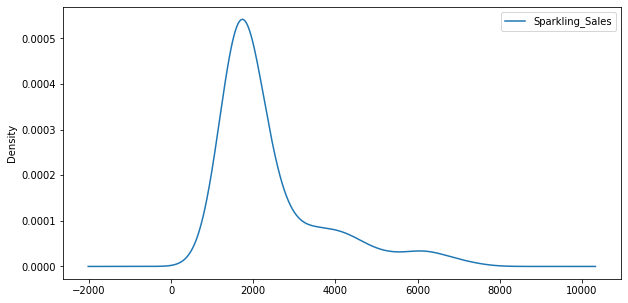

In [355]:
sparkling_data.plot(kind='kde', figsize=(10,5))

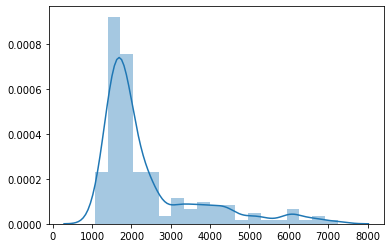

In [356]:
sns.distplot(sparkling_data)

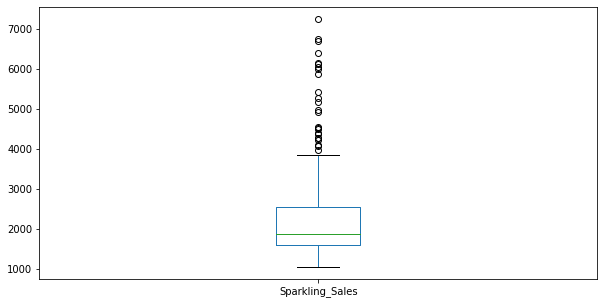

In [28]:
sparkling_data.plot(kind='box', figsize=(10,5))

In [30]:
# resampling - to aggregate annual sales values
sparkling_yearly_df = sparkling_data.resample('A').sum()

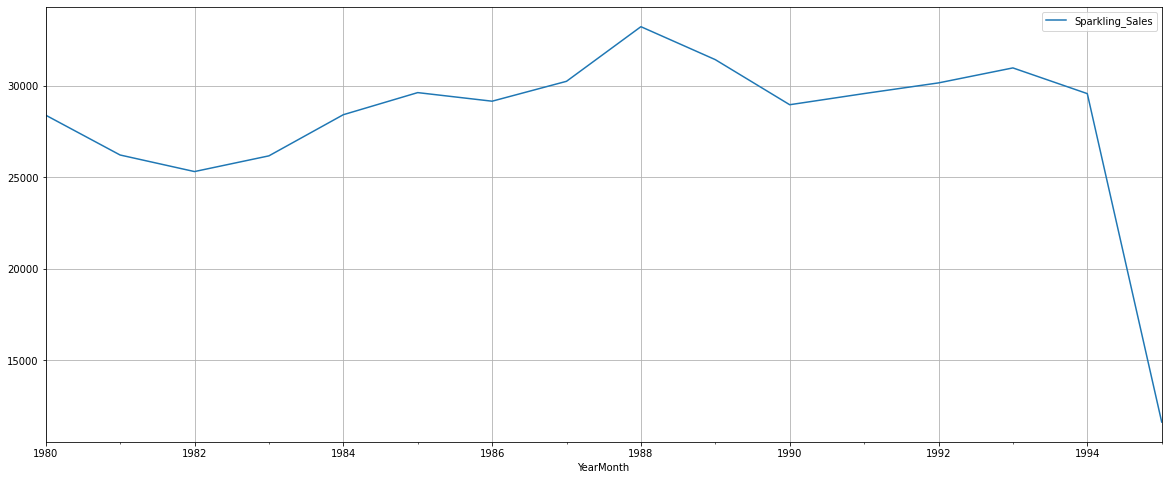

In [34]:
sparkling_yearly_df.plot(figsize=(20,8))
plt.grid()

In [35]:
sparkling_quarterly_df = sparkling_data.resample('Q').sum()

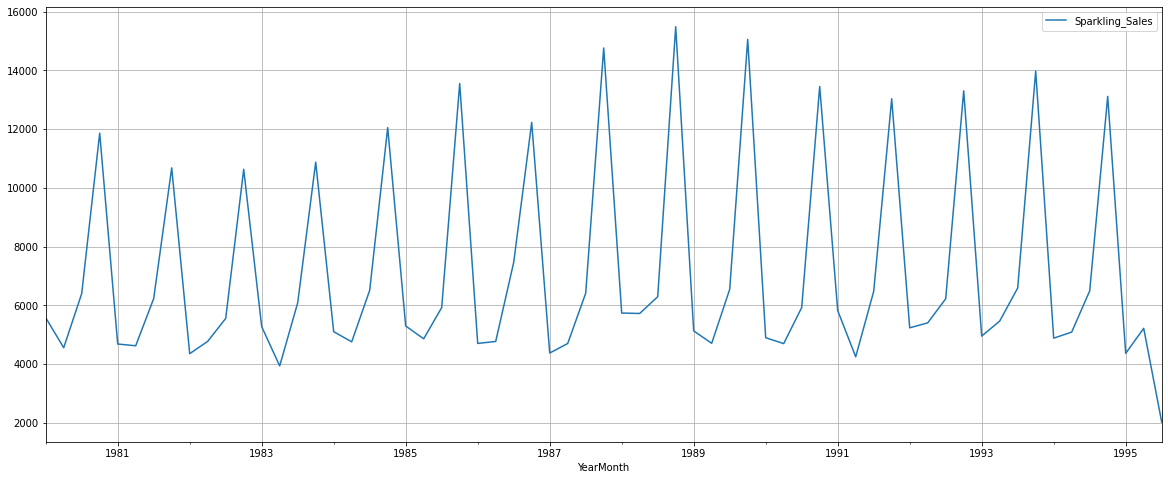

In [36]:
sparkling_quarterly_df.plot(figsize=(20,8))
plt.grid()

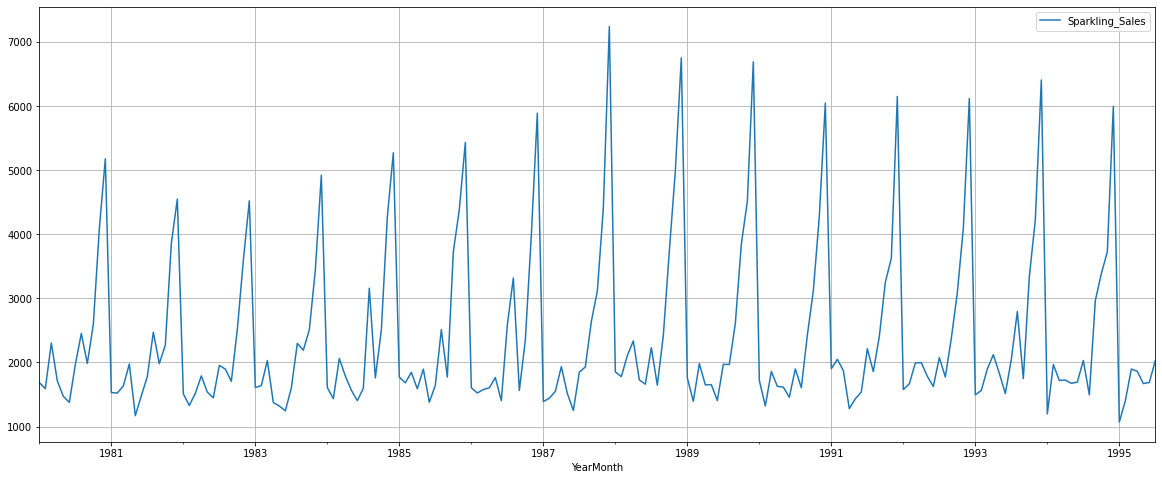

In [37]:
sparkling_data.plot(figsize=(20,8))
plt.grid()

In [42]:
## visualising the sales patterns using boxplots

In [51]:
sparkling_data[sparkling_data.index.month==1]

Sparkling_Sales
YearMonth                  
1980-01-01             1686
1981-01-01             1530
1982-01-01             1510
1983-01-01             1609
1984-01-01             1609
1985-01-01             1771
1986-01-01             1606
1987-01-01             1389
1988-01-01             1853
1989-01-01             1757
1990-01-01             1720
1991-01-01             1902
1992-01-01             1577
1993-01-01             1494
1994-01-01             1197
1995-01-01             1070

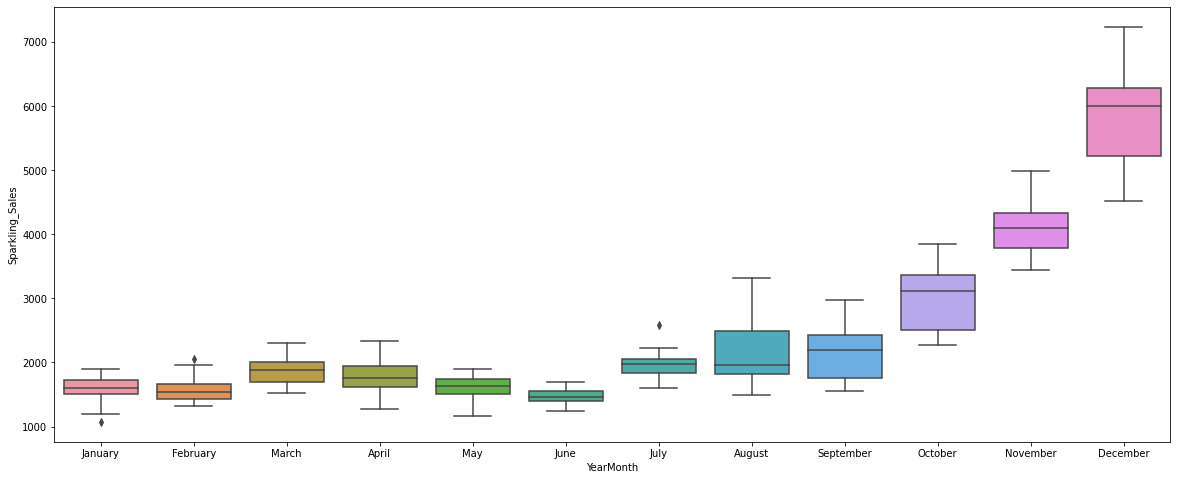

In [69]:
## general monthly pattern
plt.figure(figsize=(20,8))
sns.boxplot(sparkling_data.index.month_name(), sparkling_data['Sparkling_Sales'])

In [54]:
sparkling_data[sparkling_data.index.year==1980]

Sparkling_Sales
YearMonth                  
1980-01-01             1686
1980-02-01             1591
1980-03-01             2304
1980-04-01             1712
1980-05-01             1471
1980-06-01             1377
1980-07-01             1966
1980-08-01             2453
1980-09-01             1984
1980-10-01             2596
1980-11-01             4087
1980-12-01             5179

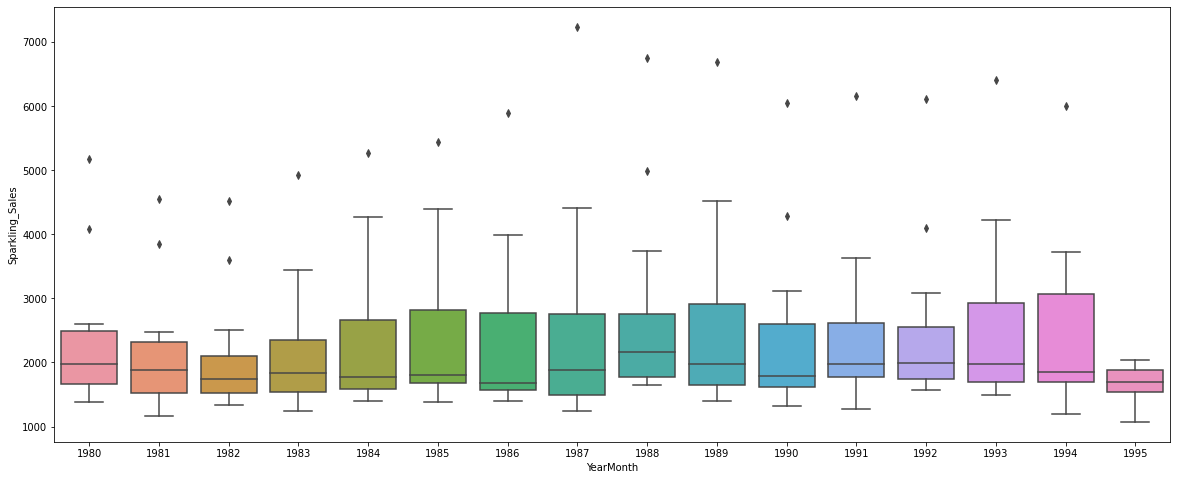

In [55]:
# boxplot of monthly sales, per year
plt.figure(figsize=(20,8))
sns.boxplot(sparkling_data.index.year, sparkling_data.Sparkling_Sales)

In [59]:
## pivot table

In [60]:
## Mapping Sales across months

In [73]:
piv_xm_yy = pd.pivot_table(data=sparkling_data, values='Sparkling_Sales', index=sparkling_data.index.month, columns=sparkling_data.index.year)

In [74]:
piv_xm_yy

YearMonth    1980    1981    1982    1983    1984    1985    1986    1987  \
YearMonth                                                                   
1          1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0   
2          1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0   
3          2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0   
4          1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0   
5          1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0   
6          1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0   
7          1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0   
8          2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0   
9          1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0   
10         2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0   
11         4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0   
12         5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0   

YearMonth    1988    1989    1990    1991    1992    1993    1994    1995  
YearMonth                                                                  
1          1853.0  1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
2          1779.0  1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
3          2108.0  1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
4          2336.0  1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
5          1728.0  1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
6          1661.0  1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
7          2230.0  1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
8          1645.0  1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
9          2421.0  2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
10         3740.0  3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
11         4988.0  4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
12         6757.0  6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

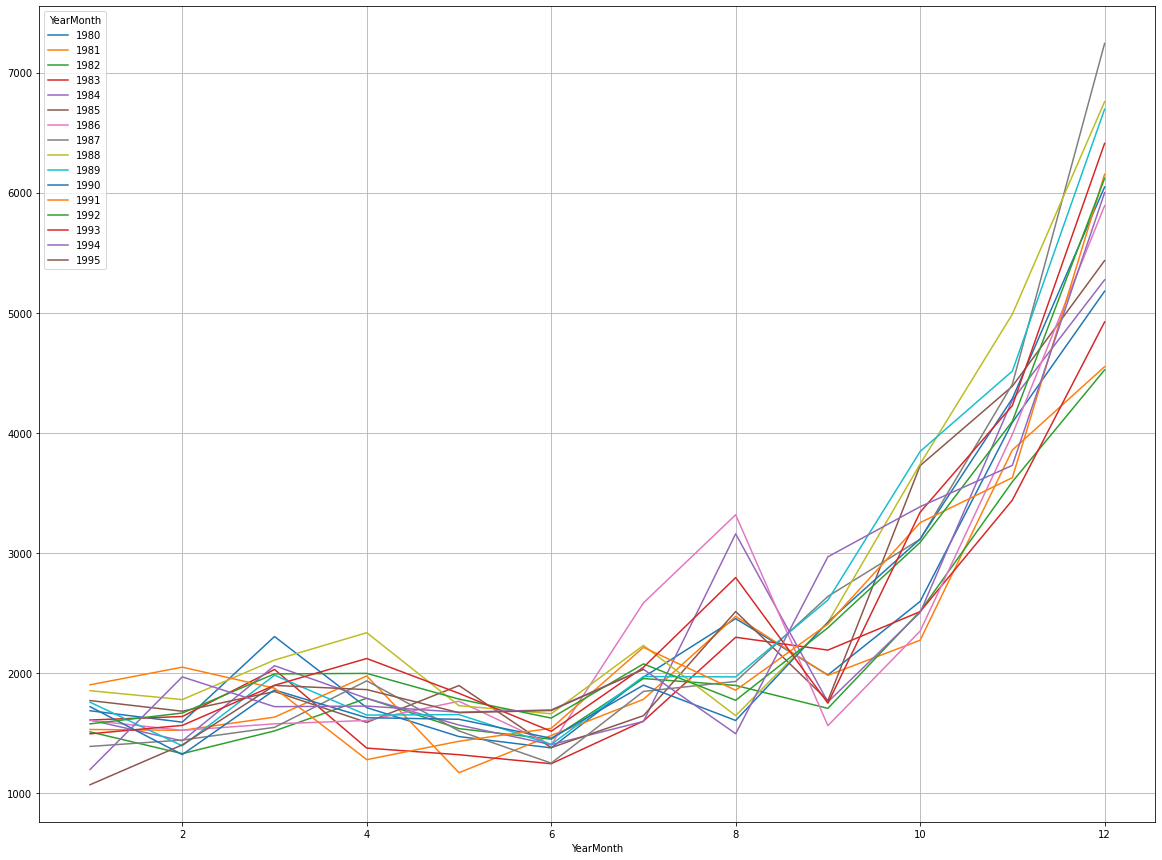

In [75]:
piv_xm_yy.plot(figsize = (20,15))
plt.grid()

In [76]:
## Mapping Sales across quarters

In [77]:
piv_xq_yy = pd.pivot_table(data=sparkling_data, values='Sparkling_Sales', index=sparkling_data.index.quarter, columns=sparkling_data.index.year)

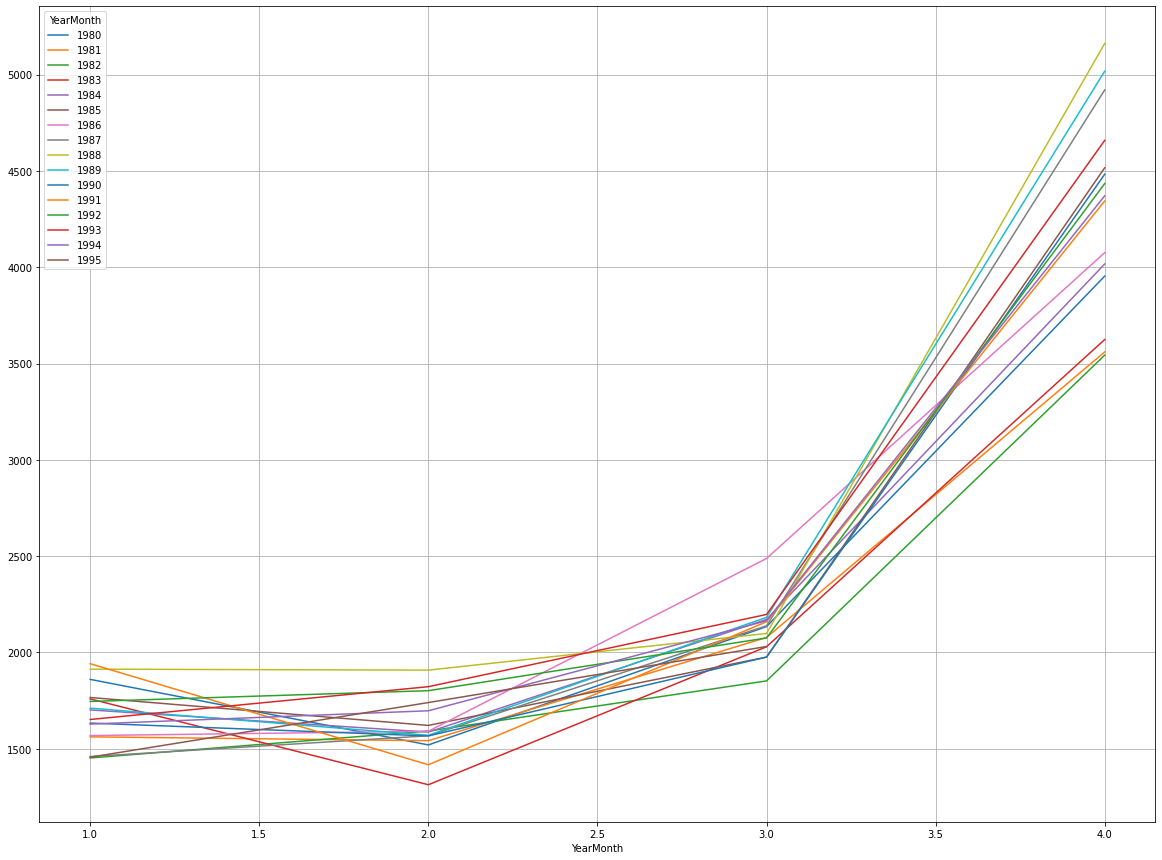

In [78]:
piv_xq_yy.plot(figsize=(20,15))
plt.grid()

In [79]:
## monthly sales across years

In [80]:
monthly_sales_across_years = pd.pivot_table(sparkling_data, values = 'Sparkling_Sales', columns = sparkling_data.index.month_name(), index = sparkling_data.index.year)
monthly_sales_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

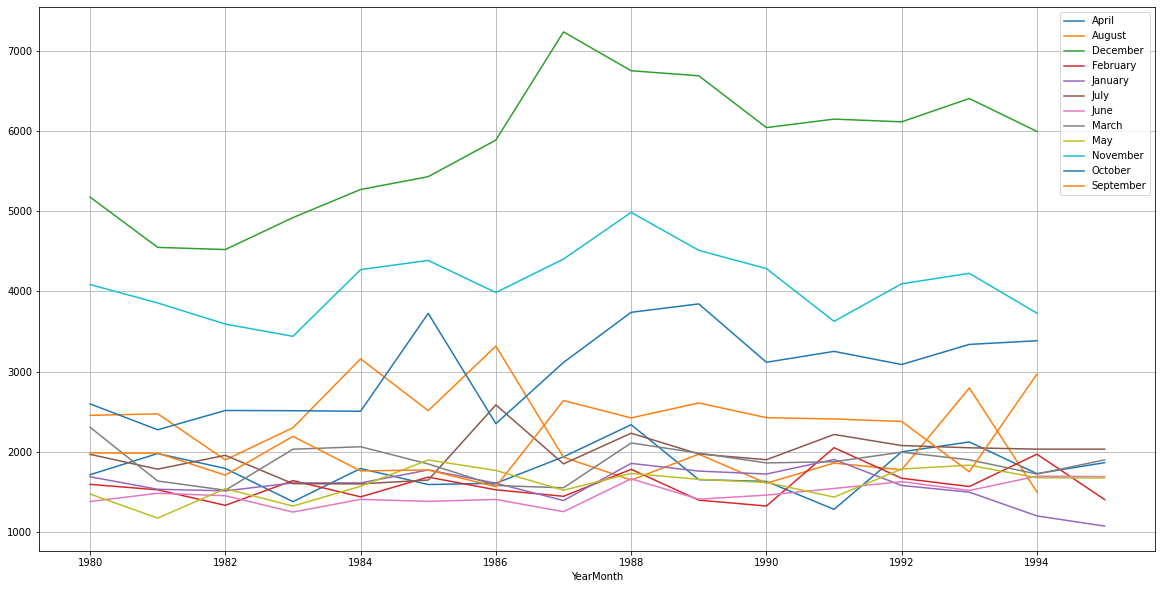

In [81]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [82]:
## Decomposition

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1440x576 with 0 Axes>

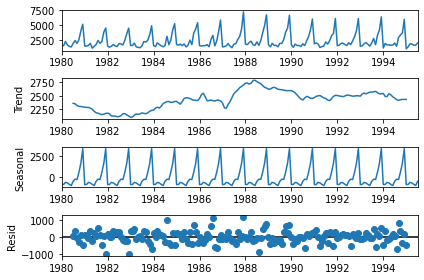

In [84]:
## Additive Seasonality assumption
plt.figure(figsize=(20,8))
decomposition_1 = seasonal_decompose(sparkling_data,model='additive')
decomposition_1.plot()
plt.show()

In [85]:
decomposition_1.trend[0:20]

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
1981-01-01    2290.375000
1981-02-01    2283.458333
1981-03-01    2284.125000
1981-04-01    2270.541667
1981-05-01    2247.500000
1981-06-01    2211.750000
1981-07-01    2184.750000
1981-08-01    2175.833333
Name: trend, dtype: float64

In [86]:
decomposition_1.seasonal[0:24]

YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
1981-01-01    -854.260599
1981-02-01    -830.350678
1981-03-01    -592.356630
1981-04-01    -658.490559
1981-05-01    -824.416154
1981-06-01    -967.434011
1981-07-01    -465.502265
1981-08-01    -214.332821
1981-09-01    -254.677265
1981-10-01     599.769957
1981-11-01    1675.067179
1981-12-01    3386.983846
Name: seasonal, dtype: float64

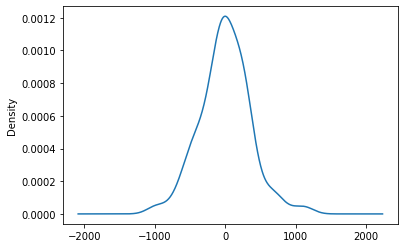

In [87]:
decomposition_1.resid.plot(kind='kde')

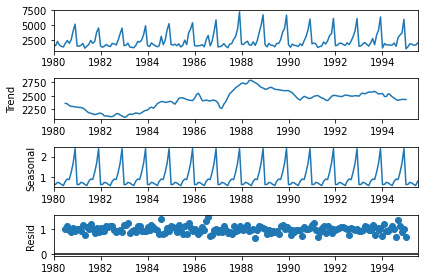

In [88]:
## Multplicative Seasonality Assumption
decomposition_2 = seasonal_decompose(sparkling_data,model='multiplicative')
decomposition_2.plot()
plt.show()

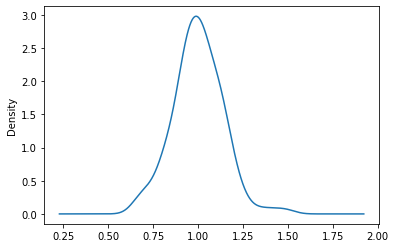

In [89]:
decomposition_2.resid.plot(kind='kde')

In [90]:
decomposition_2.trend[0:20]

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
1981-01-01    2290.375000
1981-02-01    2283.458333
1981-03-01    2284.125000
1981-04-01    2270.541667
1981-05-01    2247.500000
1981-06-01    2211.750000
1981-07-01    2184.750000
1981-08-01    2175.833333
Name: trend, dtype: float64

In [91]:
decomposition_2.seasonal[:24]

YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
1981-01-01    0.649843
1981-02-01    0.659214
1981-03-01    0.757440
1981-04-01    0.730351
1981-05-01    0.660609
1981-06-01    0.603468
1981-07-01    0.809164
1981-08-01    0.918822
1981-09-01    0.894367
1981-10-01    1.241789
1981-11-01    1.690158
1981-12-01    2.384776
Name: seasonal, dtype: float64

<h3>Question 3. Split the data into training and test. The test data should start in 1991.</h3>

In [92]:
sparkling_data[:'1990']

Sparkling_Sales
YearMonth                  
1980-01-01             1686
1980-02-01             1591
1980-03-01             2304
1980-04-01             1712
1980-05-01             1471
...                     ...
1990-08-01             1605
1990-09-01             2424
1990-10-01             3116
1990-11-01             4286
1990-12-01             6047

[132 rows x 1 columns]

In [93]:
sparkling_data['1991':]

Sparkling_Sales
YearMonth                  
1991-01-01             1902
1991-02-01             2049
1991-03-01             1874
1991-04-01             1279
1991-05-01             1432
1991-06-01             1540
1991-07-01             2214
1991-08-01             1857
1991-09-01             2408
1991-10-01             3252
1991-11-01             3627
1991-12-01             6153
1992-01-01             1577
1992-02-01             1667
1992-03-01             1993
1992-04-01             1997
1992-05-01             1783
1992-06-01             1625
1992-07-01             2076
1992-08-01             1773
1992-09-01             2377
1992-10-01             3088
1992-11-01             4096
1992-12-01             6119
1993-01-01             1494
1993-02-01             1564
1993-03-01             1898
1993-04-01             2121
1993-05-01             1831
1993-06-01             1515
1993-07-01             2048
1993-08-01             2795
1993-09-01             1749
1993-10-01             3339
1993-11-01             4227
1993-12-01             6410
1994-01-01             1197
1994-02-01             1968
1994-03-01             1720
1994-04-01             1725
1994-05-01             1674
1994-06-01             1693
1994-07-01             2031
1994-08-01             1495
1994-09-01             2968
1994-10-01             3385
1994-11-01             3729
1994-12-01             5999
1995-01-01             1070
1995-02-01             1402
1995-03-01             1897
1995-04-01             1862
1995-05-01             1670
1995-06-01             1688
1995-07-01             2031

132 months' data in the training set, and last 55 months' data in the test set

In [95]:
## Split Data into Training and Test datasets. All data for year 1991 and onwards will be in Test data. 

In [96]:
sparkling_train    =   sparkling_data[:'1990']
sparkling_test     =   sparkling_data['1991':]

In [97]:
sparkling_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sparkling_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 7.9 KB


In [98]:
sparkling_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sparkling_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [99]:
sparkling_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sparkling_Sales  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [100]:
sparkling_train.tail()

Sparkling_Sales
YearMonth                  
1990-08-01             1605
1990-09-01             2424
1990-10-01             3116
1990-11-01             4286
1990-12-01             6047

In [101]:
sparkling_test.head()

Sparkling_Sales
YearMonth                  
1991-01-01             1902
1991-02-01             2049
1991-03-01             1874
1991-04-01             1279
1991-05-01             1432

In [102]:
sparkling_test.tail()

Sparkling_Sales
YearMonth                  
1995-03-01             1897
1995-04-01             1862
1995-05-01             1670
1995-06-01             1688
1995-07-01             2031

In [104]:
## verifying the number of records in the training and test sets
print(sparkling_train.shape)
print(sparkling_test.shape)

(132, 1)
(55, 1)


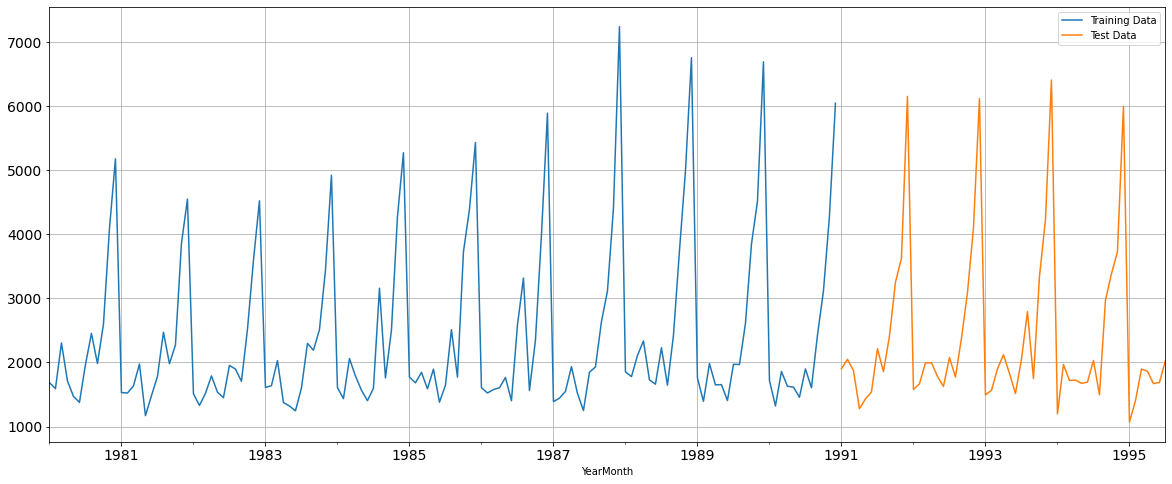

In [106]:
sparkling_train['Sparkling_Sales'].plot(figsize=(20,8), fontsize=14)
sparkling_test['Sparkling_Sales'].plot(figsize=(20,8), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

<h3>Question 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. <br>Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. - Please do try to build as many models as possible and as many iterations of models as possible with different parameters.</h3>

In [108]:
## MODEL BUILDING - starting with linear regression, naive, moving averages, moving to Exponential Smoothing  models

In [109]:
## Model 1 - Linear Regression

In [110]:
# create a time column for train and test data
train_time = [i+1 for i in range(len(sparkling_train))]
test_time = [i+133 for i in range(len(sparkling_test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [111]:
LR_train = sparkling_train.copy()
LR_test = sparkling_test.copy()

In [112]:
# attach the timeline column to the train and test sets, for linear regression modeling
LR_train['time'] = train_time
LR_test['time'] = test_time

print('First few rows of Training Data','\n',LR_train.head(),'\n')
print('Last few rows of Training Data','\n',LR_train.tail(),'\n')
print('First few rows of Test Data','\n',LR_test.head(),'\n')
print('Last few rows of Test Data','\n',LR_test.tail(),'\n')

First few rows of Training Data 
             Sparkling_Sales  time
YearMonth                        
1980-01-01             1686     1
1980-02-01             1591     2
1980-03-01             2304     3
1980-04-01             1712     4
1980-05-01             1471     5 

Last few rows of Training Data 
             Sparkling_Sales  time
YearMonth                        
1990-08-01             1605   128
1990-09-01             2424   129
1990-10-01             3116   130
1990-11-01             4286   131
1990-12-01             6047   132 

First few rows of Test Data 
             Sparkling_Sales  time
YearMonth                        
1991-01-01             1902   133
1991-02-01             2049   134
1991-03-01             1874   135
1991-04-01             1279   136
1991-05-01             1432   137 

Last few rows of Test Data 
             Sparkling_Sales  time
YearMonth                        
1995-03-01             1897   183
1995-04-01             1862   184
1995-05-01        

In [113]:
# import the required library for a LR model
from sklearn.linear_model import LinearRegression

In [114]:
lr = LinearRegression()

In [115]:
LR_train.head()

Sparkling_Sales  time
YearMonth                        
1980-01-01             1686     1
1980-02-01             1591     2
1980-03-01             2304     3
1980-04-01             1712     4
1980-05-01             1471     5

In [116]:
lr.fit(LR_train[['time']],LR_train['Sparkling_Sales'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
train_predictions_model1_lr = lr.predict(LR_train[['time']])
LR_train['RegOnTime'] = train_predictions_model1_lr


In [118]:
test_predictions_model1_lr = lr.predict(LR_test[['time']])
LR_test['RegOnTime'] = test_predictions_model1_lr


In [119]:
LR_train.head()

Sparkling_Sales  time    RegOnTime
YearMonth                                     
1980-01-01             1686     1  2021.741171
1980-02-01             1591     2  2027.573830
1980-03-01             2304     3  2033.406488
1980-04-01             1712     4  2039.239147
1980-05-01             1471     5  2045.071805

In [120]:
LR_test.head()

Sparkling_Sales  time    RegOnTime
YearMonth                                     
1991-01-01             1902   133  2791.652093
1991-02-01             2049   134  2797.484752
1991-03-01             1874   135  2803.317410
1991-04-01             1279   136  2809.150069
1991-05-01             1432   137  2814.982727

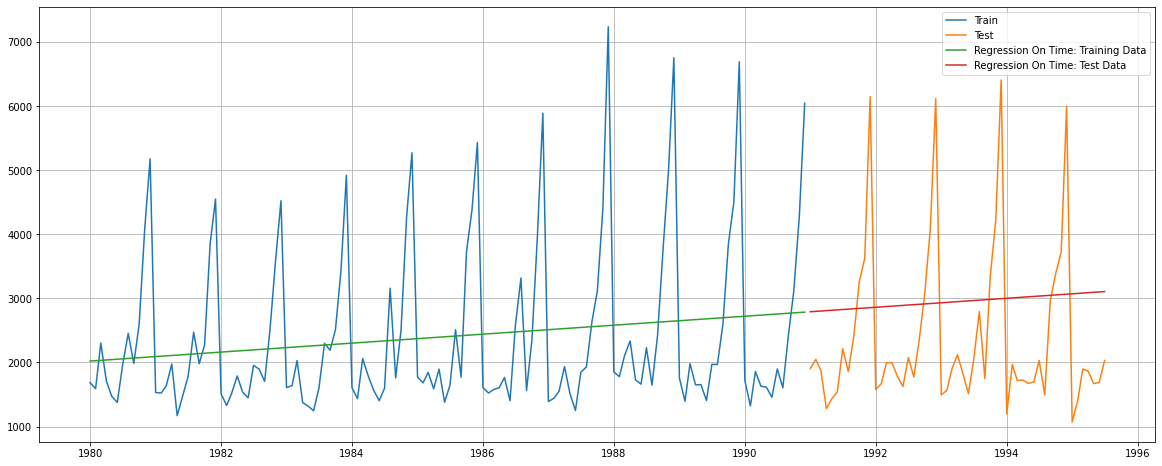

In [135]:
plt.figure(figsize=(20,8))
plt.plot(sparkling_train['Sparkling_Sales'], label='Train')
plt.plot(sparkling_test['Sparkling_Sales'], label='Test')
plt.plot(LR_train['RegOnTime'], label='Regression On Time: Training Data')
plt.plot(LR_test['RegOnTime'], label='Regression On Time: Test Data')
plt.legend(loc='best')
plt.grid()

In [122]:
## metrics for evaluation

In [123]:
from sklearn import metrics

In [124]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [125]:
## Training Data - RMSE and MAPE

rmse_model1_lr_train = metrics.mean_squared_error(sparkling_train['Sparkling_Sales'],train_predictions_model1_lr,squared=False)
mape_model1_lr_train = MAPE(sparkling_train['Sparkling_Sales'],train_predictions_model1_lr)
print("For RegressionOnTime forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_lr_train, mape_model1_lr_train))

For RegressionOnTime forecast on the Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [126]:
## Test Data - RMSE and MAPE

rmse_model1_lr_test = metrics.mean_squared_error(sparkling_test['Sparkling_Sales'],test_predictions_model1_lr,squared=False)
mape_model1_lr_test = MAPE(sparkling_test['Sparkling_Sales'],test_predictions_model1_lr)
print("For RegressionOnTime forecast on the Test Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_lr_test, mape_model1_lr_test))

For RegressionOnTime forecast on the Test Data:  RMSE is 1389.135 and MAPE is 50.15


In [127]:
## tabulating the results, for future comparison and assessment
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_lr_test],'Test MAPE': [mape_model1_lr_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

In [128]:
## Model 2 - Naive Forecast

In [129]:
NaiveModel_train = sparkling_train.copy()
NaiveModel_test = sparkling_test.copy()

In [130]:
np.asarray(sparkling_train['Sparkling_Sales'])[len(np.asarray(sparkling_train['Sparkling_Sales']))-1]

6047

In [131]:
## Getting the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(sparkling_train['Sparkling_Sales'])[len(np.asarray(sparkling_train['Sparkling_Sales']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
Name: naive, dtype: int64

In [132]:
## assigning the same value on test set. 
NaiveModel_test['naive'] = np.asarray(sparkling_train['Sparkling_Sales'])[len(np.asarray(sparkling_train['Sparkling_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

In [133]:
NaiveModel_test.head()

Sparkling_Sales  naive
YearMonth                         
1991-01-01             1902   6047
1991-02-01             2049   6047
1991-03-01             1874   6047
1991-04-01             1279   6047
1991-05-01             1432   6047

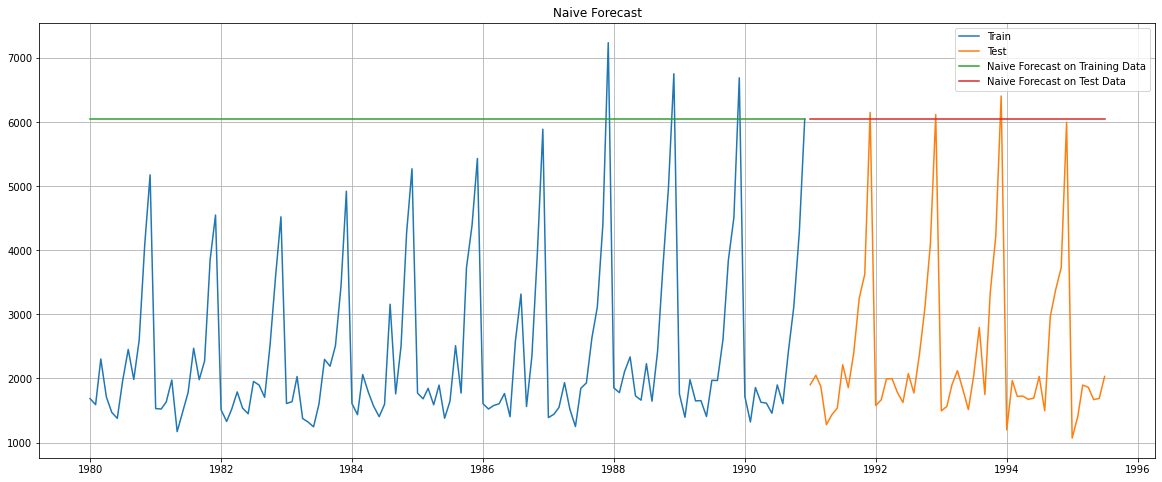

In [134]:
plt.figure(figsize=(20,8))
plt.plot(NaiveModel_train['Sparkling_Sales'], label='Train')
plt.plot(NaiveModel_test['Sparkling_Sales'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()

In [136]:
## model evaluation

In [138]:
## Training Data - RMSE and MAPE

rmse_model2_nm_train = metrics.mean_squared_error(NaiveModel_train['Sparkling_Sales'],NaiveModel_train['naive'],squared=False)
mape_model2_nm_train = MAPE(NaiveModel_train['Sparkling_Sales'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_nm_train, mape_model2_nm_train))

For Naive Model forecast on the Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [139]:
## Test Data - RMSE and MAPE

rmse_model2_nm_test = metrics.mean_squared_error(NaiveModel_test['Sparkling_Sales'],NaiveModel_test['naive'],squared=False)
mape_model2_nm_test = MAPE(NaiveModel_test['Sparkling_Sales'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_nm_test, mape_model2_nm_test))

For RegressionOnTime forecast on the Test Data:  RMSE is 3864.279 and MAPE is 152.87


In [140]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_nm_test],'Test MAPE': [mape_model2_nm_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

In [142]:
## Model 3 - Simple Average

In [141]:
SimpleAverage_train = sparkling_train.copy()
SimpleAverage_test = sparkling_test.copy()

In [143]:
## Getting the Mean value of the training set

SimpleAverage_train['Sparkling_Sales'].mean()

2403.780303030303

In [144]:
SimpleAverage_train['mean_forecast'] = SimpleAverage_train['Sparkling_Sales'].mean()
SimpleAverage_train.head()

Sparkling_Sales  mean_forecast
YearMonth                                 
1980-01-01             1686    2403.780303
1980-02-01             1591    2403.780303
1980-03-01             2304    2403.780303
1980-04-01             1712    2403.780303
1980-05-01             1471    2403.780303

In [145]:
SimpleAverage_test['mean_forecast'] = SimpleAverage_train['Sparkling_Sales'].mean()
SimpleAverage_test.head()

Sparkling_Sales  mean_forecast
YearMonth                                 
1991-01-01             1902    2403.780303
1991-02-01             2049    2403.780303
1991-03-01             1874    2403.780303
1991-04-01             1279    2403.780303
1991-05-01             1432    2403.780303

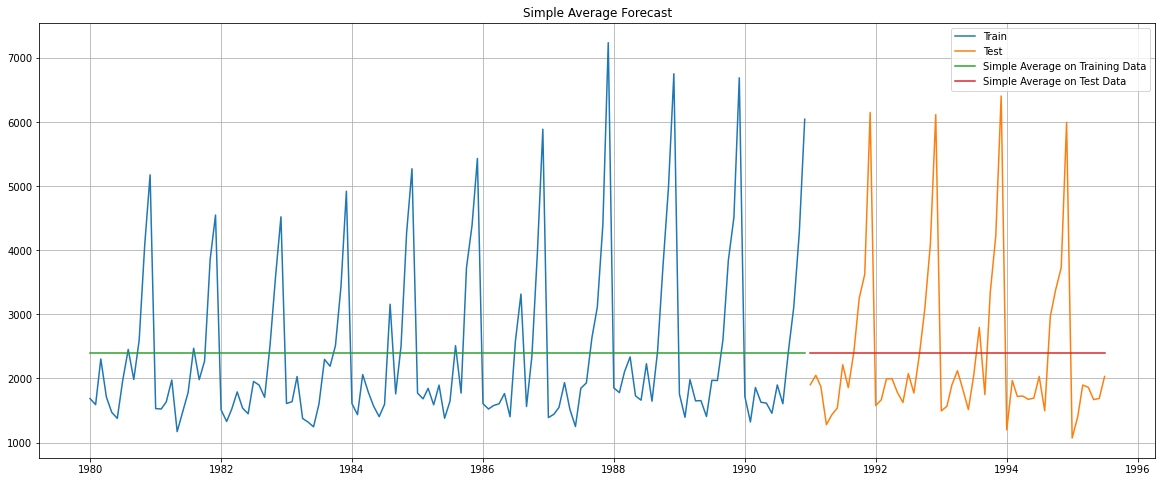

In [146]:
plt.figure(figsize=(20,8))
plt.plot(SimpleAverage_train['Sparkling_Sales'], label='Train')
plt.plot(SimpleAverage_test['Sparkling_Sales'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid()

In [147]:
## Training Data - RMSE and MAPE

rmse_model3_sa_train = metrics.mean_squared_error(SimpleAverage_train['Sparkling_Sales'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_sa_train = MAPE(SimpleAverage_train['Sparkling_Sales'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_sa_train, mape_model3_sa_train))

For Simple Average Model forecast on the Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [148]:
## Test Data - RMSE and MAPE

rmse_model3_sa_test = metrics.mean_squared_error(SimpleAverage_test['Sparkling_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_sa_test = MAPE(SimpleAverage_test['Sparkling_Sales'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data: RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_sa_test, mape_model3_sa_test))

For Simple Average forecast on the Test Data: RMSE is 1275.082 and MAPE is 38.90


In [149]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_sa_test],'Test MAPE': [mape_model3_sa_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

In [150]:
## Model 4 - Moving Average/s

In [151]:
## moving averages computed on the entire data set **

In [152]:
MovingAverage = sparkling_data.copy()
MovingAverage.head()

Sparkling_Sales
YearMonth                  
1980-01-01             1686
1980-02-01             1591
1980-03-01             2304
1980-04-01             1712
1980-05-01             1471

In [153]:
MovingAverage['Trailing_3'] = MovingAverage['Sparkling_Sales'].rolling(3).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling_Sales'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Sparkling_Sales'].rolling(12).mean()

MovingAverage.head()

Sparkling_Sales   Trailing_3  Trailing_6  Trailing_9  Trailing_12
YearMonth                                                                    
1980-01-01             1686          NaN         NaN         NaN          NaN
1980-02-01             1591          NaN         NaN         NaN          NaN
1980-03-01             2304  1860.333333         NaN         NaN          NaN
1980-04-01             1712  1869.000000         NaN         NaN          NaN
1980-05-01             1471  1829.000000         NaN         NaN          NaN

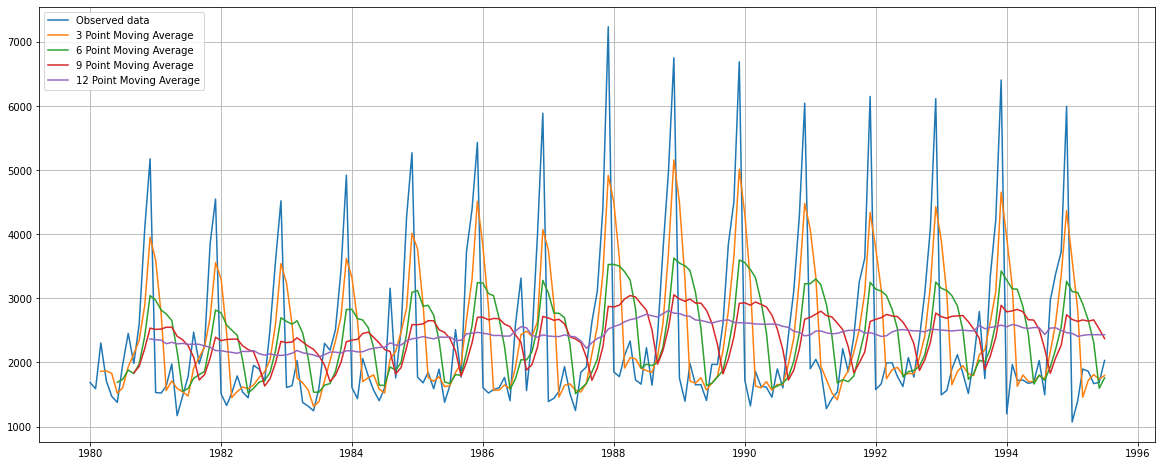

In [154]:
## Plotting the whole data

plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Sparkling_Sales'], label='Observed data')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()

In [155]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[:'1990']
trailing_MovingAverage_test=MovingAverage['1991':]


In [157]:
trailing_MovingAverage_test.tail()

Sparkling_Sales   Trailing_3   Trailing_6   Trailing_9  \
YearMonth                                                            
1995-03-01             1897  1456.333333  2913.666667  2664.000000   
1995-04-01             1862  1720.333333  2659.833333  2645.222222   
1995-05-01             1670  1809.666667  2316.666667  2664.666667   
1995-06-01             1688  1740.000000  1598.166667  2522.444444   
1995-07-01             2031  1796.333333  1758.333333  2372.000000   

            Trailing_12  
YearMonth                
1995-03-01  2422.333333  
1995-04-01  2433.750000  
1995-05-01  2433.416667  
1995-06-01  2433.000000  
1995-07-01  2433.000000

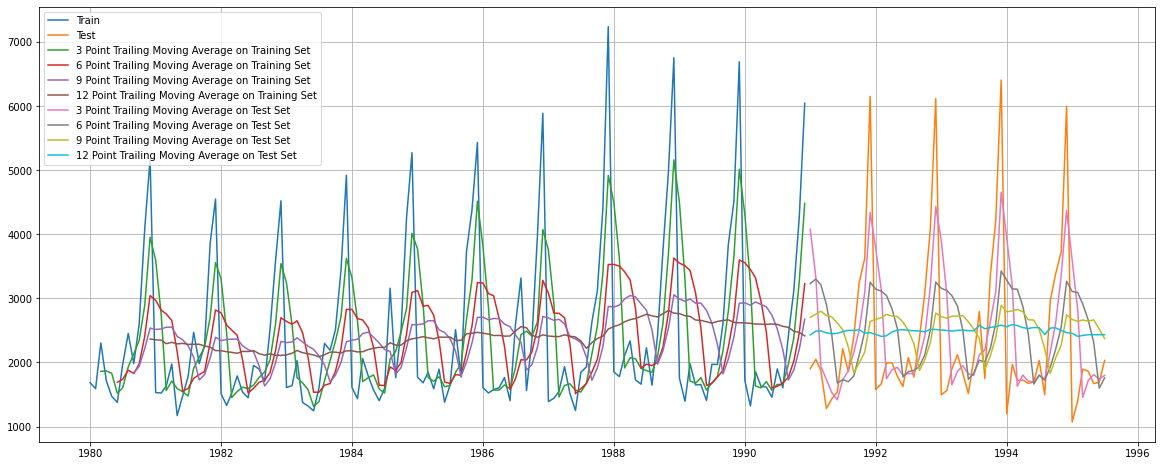

In [158]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(trailing_MovingAverage_train['Sparkling_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling_Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'], label='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_12'],label = '12 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid()

In [159]:
## evaluating on the Test data

In [160]:
## Test Data - RMSE and MAPE --> 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling_Sales'],trailing_MovingAverage_test['Trailing_3'],squared=False)
mape_model4_test_3 = MAPE(trailing_MovingAverage_test['Sparkling_Sales'],trailing_MovingAverage_test['Trailing_3'])
print("For 3 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_3, mape_model4_test_3))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(trailing_MovingAverage_test['Sparkling_Sales'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(trailing_MovingAverage_test['Sparkling_Sales'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

## Test Data - RMSE and MAPE --> 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling_Sales'],trailing_MovingAverage_test['Trailing_12'],squared=False)
mape_model4_test_12 = MAPE(trailing_MovingAverage_test['Sparkling_Sales'],trailing_MovingAverage_test['Trailing_12'])
print("For 12 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_12, mape_model4_test_12))

For 3 point Moving Average Model forecast on the Test Data,  RMSE is 1028.606 and MAPE is 29.73
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927 and MAPE is 43.86
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 and MAPE is 46.86
For 12 point Moving Average Model forecast on the Test Data,  RMSE is 1267.925 and MAPE is 40.19


In [161]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_3,rmse_model4_test_6
                                          ,rmse_model4_test_9,rmse_model4_test_12]
                            ,'Test MAPE': [mape_model4_test_3,mape_model4_test_6,mape_model4_test_9
                                           ,mape_model4_test_12]}
                           ,index=['3pointTrailingMovingAverage','6pointTrailingMovingAverage'
                                   ,'9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime              1389.135175      50.15
NaiveModel                    3864.279352     152.87
SimpleAverageModel            1275.081804      38.90
3pointTrailingMovingAverage   1028.605756      29.73
6pointTrailingMovingAverage   1283.927428      43.86
9pointTrailingMovingAverage   1346.278315      46.86
12pointTrailingMovingAverage  1267.925330      40.19

In [393]:
## Comparing the models so far

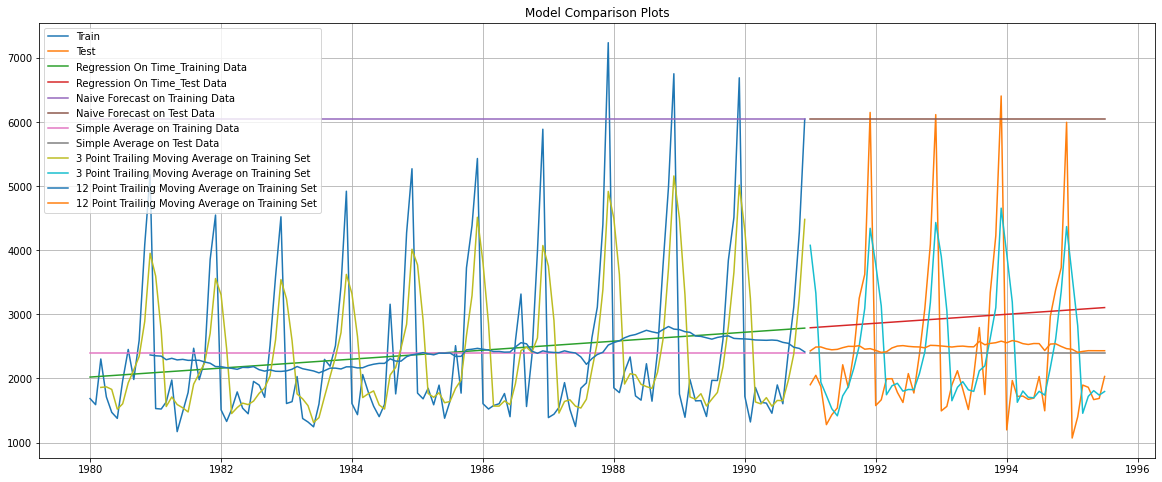

In [164]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,8))
plt.plot(sparkling_train['Sparkling_Sales'], label='Train')
plt.plot(sparkling_test['Sparkling_Sales'], label='Test')

plt.plot(LR_train['RegOnTime'], label='Regression On Time_Training Data')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_train['Trailing_12'], label='12 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_12'], label='12 Point Trailing Moving Average on Training Set')


plt.legend(loc='upper left')
plt.title("Model Comparison Plots")
plt.grid()

In [165]:
## EXPONENTIAL SMOOTHING

In [166]:
# importing the required libraries for exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [227]:
## Method 5: SINGLE EXPONENTIAL SMOOTHING

In [168]:
SES_train = sparkling_train.copy()
SES_test = sparkling_test.copy()

In [169]:
## SES - AUTO FIT

In [170]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling_Sales'])

In [171]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [172]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7828696439005,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [173]:
SES_train['predicted'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling_Sales   predicted
YearMonth                              
1980-01-01             1686  2403.78287
1980-02-01             1591  2403.78287
1980-03-01             2304  2403.78287
1980-04-01             1712  2403.78287
1980-05-01             1471  2403.78287

In [174]:
len(SES_test)

55

In [175]:
SES_test['predicted'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling_Sales   predicted
YearMonth                              
1991-01-01             1902  2403.78287
1991-02-01             2049  2403.78287
1991-03-01             1874  2403.78287
1991-04-01             1279  2403.78287
1991-05-01             1432  2403.78287

In [176]:
SES_test.tail()

Sparkling_Sales   predicted
YearMonth                              
1995-03-01             1897  2403.78287
1995-04-01             1862  2403.78287
1995-05-01             1670  2403.78287
1995-06-01             1688  2403.78287
1995-07-01             2031  2403.78287

Text(0.5, 1.0, 'Alpha = 0 Predictions')

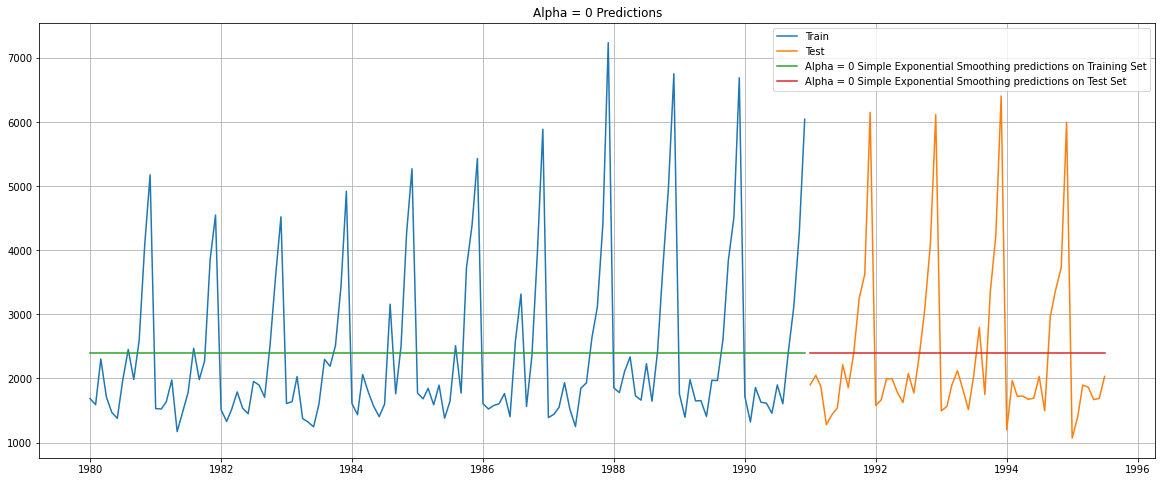

In [177]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Sparkling_Sales'], label='Train')
plt.plot(SES_test['Sparkling_Sales'], label='Test')

plt.plot(SES_train['predicted'], label='Alpha = 0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predicted'], label='Alpha = 0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0 Predictions')

In [178]:
## Model Evaluation for alpha = 0 : Simple Exponential Smoothing

In [180]:
## Training Data

rmse_model5_ses_train_1 = metrics.mean_squared_error(SES_train['Sparkling_Sales'],SES_train['predicted'],squared=False)
mape_model5_ses_train_1 = MAPE(SES_train['Sparkling_Sales'],SES_train['predicted'])
print("For Alpha = 0 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_ses_train_1, mape_model5_ses_train_1))

For Alpha = 0 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is 1298.484 and MAPE is 40.36


In [181]:
## Test Data

rmse_model5_ses_test_1 = metrics.mean_squared_error(SES_test['Sparkling_Sales'],SES_test['predicted'],squared=False)
mape_model5_ses_test_1 = MAPE(SES_test['Sparkling_Sales'],SES_test['predicted'])
print("For Alpha = 0 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_ses_test_1, mape_model5_ses_test_1))


For Alpha = 0 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is 1275.082 and MAPE is 38.90


In [182]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [rmse_model5_ses_test_1],'Test MAPE': [mape_model5_ses_test_1]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    1389.135175      50.15
NaiveModel                          3864.279352     152.87
SimpleAverageModel                  1275.081804      38.90
3pointTrailingMovingAverage         1028.605756      29.73
6pointTrailingMovingAverage         1283.927428      43.86
9pointTrailingMovingAverage         1346.278315      46.86
12pointTrailingMovingAverage        1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing  1275.081813      38.90

In [184]:
## SES with multiple Alpha value options: running a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [185]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_5_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_5_2

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [417]:
len(SES_test)

55

In [187]:
for i in np.arange(0.1,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_2_train_i = metrics.mean_squared_error(SES_train['Sparkling_Sales'],SES_train['predict',i],squared=False)
    mape_model5_2_train_i = MAPE(SES_train['Sparkling_Sales'],SES_train['predict',i])
    
    rmse_model5_2_test_i = metrics.mean_squared_error(SES_test['Sparkling_Sales'],SES_test['predict',i],squared=False)
    mape_model5_2_test_i = MAPE(SES_test['Sparkling_Sales'],SES_test['predict',i])
    
    resultsDf_5_2 = resultsDf_5_2.append({'Alpha Values':i,'Train RMSE':rmse_model5_2_train_i 
                                      ,'Train MAPE': mape_model5_2_train_i,'Test RMSE':rmse_model5_2_test_i
                                      ,'Test MAPE':mape_model5_2_test_i}, ignore_index=True)

In [191]:
## Model Evaluation

In [188]:
resultsDf_5_2

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.1  1331.786996       42.30  1375.393526      49.53
1           0.2  1355.645334       43.91  1595.206839      60.46
2           0.3  1359.422162       43.80  1935.507132      75.66
3           0.4  1352.562367       42.79  2311.919615      91.55
4           0.5  1343.994119       41.18  2666.351413     106.27
5           0.6  1338.801427       39.81  2979.204388     118.77
6           0.7  1338.843298       38.56  3249.944092     129.34
7           0.8  1344.462035       37.60  3483.801006     138.34
8           0.9  1355.723493       36.79  3686.794285     146.08
9           1.0  1373.082528       35.83  3864.279352     152.87

The two lowest RMSE scores are for alpha values 0.1 and 0.2

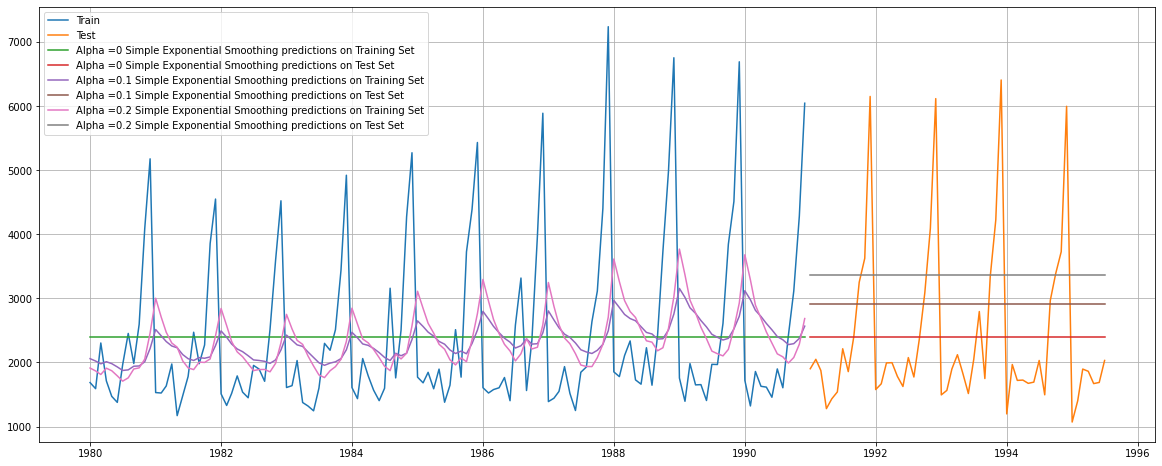

In [189]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Sparkling_Sales'], label='Train')
plt.plot(SES_test['Sparkling_Sales'], label='Test')

plt.plot(SES_train['predicted'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predicted'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()

In [190]:
## adding the scores of options with alpha 0.1 and 0.2 to the results table

resultsDf_5_cons = pd.DataFrame({'Test RMSE': [resultsDf_5_2['Test RMSE'][0],resultsDf_5_2['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_5_2['Test MAPE'][0],resultsDf_5_2['Test MAPE'][1]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing','Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_cons])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1389.135175      50.15
NaiveModel                            3864.279352     152.87
SimpleAverageModel                    1275.081804      38.90
3pointTrailingMovingAverage           1028.605756      29.73
6pointTrailingMovingAverage           1283.927428      43.86
9pointTrailingMovingAverage           1346.278315      46.86
12pointTrailingMovingAverage          1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing    1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing  1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing  1595.206839      60.46

In [193]:
## Method 6: Double Exponential Smoothing (Holt's Model)

## Two parameters alpha and beta are estimated in this model. Level and Trend are accounted for in this model.

In [194]:
DES_train = sparkling_train.copy()
DES_test = sparkling_test.copy()

In [195]:
model_DES = Holt(DES_train['Sparkling_Sales'])

In [196]:
## Autofit DES 

In [197]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [198]:
model_DES_autofit.params

{'smoothing_level': 0.6478140767757283,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0837681215924,
 'initial_slope': 27.05683338164577,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [199]:
DES_train['predicted'] = model_DES_autofit.fittedvalues
DES_train.head()

Sparkling_Sales    predicted
YearMonth                               
1980-01-01             1686  1713.140602
1980-02-01             1591  1722.615371
1980-03-01             2304  1664.409914
1980-04-01             1712  2105.802209
1980-05-01             1471  1877.748428

In [200]:
len(DES_test)

55

In [201]:
DES_test['predicted'] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

Sparkling_Sales    predicted
YearMonth                               
1991-01-01             1902  5281.498319
1991-02-01             2049  5308.555153
1991-03-01             1874  5335.611986
1991-04-01             1279  5362.668819
1991-05-01             1432  5389.725653

In [202]:
DES_test.tail()

Sparkling_Sales    predicted
YearMonth                               
1995-03-01             1897  6634.339988
1995-04-01             1862  6661.396822
1995-05-01             1670  6688.453655
1995-06-01             1688  6715.510488
1995-07-01             2031  6742.567322

Text(0.5, 1.0, 'Alpha = 0.65, Beta = 0 Predictions')

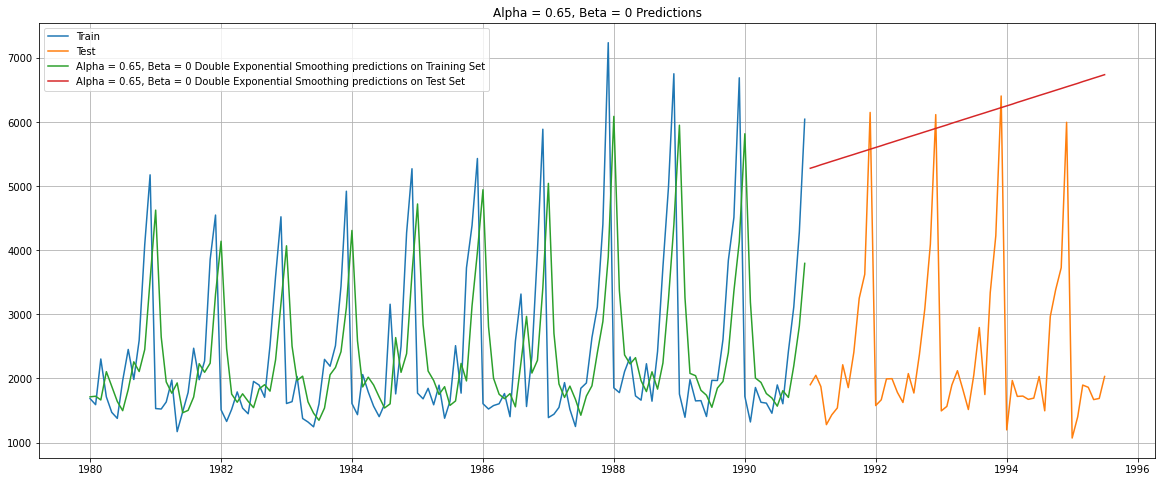

In [203]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(DES_train['Sparkling_Sales'], label='Train')
plt.plot(DES_test['Sparkling_Sales'], label='Test')

plt.plot(DES_train['predicted'], label='Alpha = 0.65, Beta = 0 Double Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['predicted'], label='Alpha = 0.65, Beta = 0 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.65, Beta = 0 Predictions')

In [205]:
## Model Evaluation for alpha = 0.65 beta = 0 : Double Exponential Smoothing

In [207]:
## Training Data

rmse_model6_des_train_1 = metrics.mean_squared_error(DES_train['Sparkling_Sales'],DES_train['predicted'],squared=False)
mape_model6_des_train_1 = MAPE(DES_train['Sparkling_Sales'],DES_train['predicted'])
print("For Alpha = 0.65, Beta = 0 Double Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model6_des_train_1, mape_model6_des_train_1))


For Alpha = 0.65, Beta = 0 Double Exponential Smoothing Model forecast on the Training Data, RMSE is 1337.484 and MAPE is 39.11


In [208]:
## Test Data

rmse_model6_des_test_1 = metrics.mean_squared_error(DES_test['Sparkling_Sales'],DES_test['predicted'],squared=False)
mape_model6_des_test_1 = MAPE(DES_test['Sparkling_Sales'],DES_test['predicted'])
print("For Alpha = 0.65, Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model6_des_test_1, mape_model6_des_test_1))


For Alpha = 0.65, Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 3850.969 and MAPE is 152.06


In [209]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_des_test_1],'Test MAPE': [mape_model6_des_test_1]}
                           ,index=['Alpha=0.65,Beta=0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                              1389.135175      50.15
NaiveModel                                    3864.279352     152.87
SimpleAverageModel                            1275.081804      38.90
3pointTrailingMovingAverage                   1028.605756      29.73
6pointTrailingMovingAverage                   1283.927428      43.86
9pointTrailingMovingAverage                   1346.278315      46.86
12pointTrailingMovingAverage                  1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing            1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing          1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing          1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing  3850.968926     152.06

In [210]:
## DES with multiple alpha and beta values: running a loop with different alpha, beta values to understand which particular value works best for alpha on the test set.

In [211]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [214]:
len(DES_test)

55

In [213]:
## using alpha and beta options from 0.1 to 1

In [216]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_2_train = metrics.mean_squared_error(DES_train['Sparkling_Sales'],DES_train['predict',i,j],squared=False)
        mape_model6_2_train = MAPE(DES_train['Sparkling_Sales'],DES_train['predict',i,j])
        
        rmse_model6_2_test = metrics.mean_squared_error(DES_test['Sparkling_Sales'],DES_test['predict',i,j],squared=False)
        mape_model6_2_test = MAPE(DES_test['Sparkling_Sales'],DES_test['predict',i,j])
        
        resultsDf_6_2 = resultsDf_6_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_2_train
                                      ,'Train MAPE': mape_model6_2_train,'Test RMSE':rmse_model6_2_test
                                      ,'Test MAPE':mape_model6_2_test}, ignore_index=True)

In [217]:
resultsDf_6_2

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.1          0.1  1363.474022       44.26   1779.424760   
1            0.1          0.2  1401.756935       45.65   2599.788597   
2            0.1          0.3  1435.329601       46.85   4290.125020   
3            0.1          0.4  1471.353975       48.26   6041.557151   
4            0.1          0.5  1512.136257       49.84   7389.055397   
..           ...          ...          ...         ...           ...   
95           1.0          0.6  1753.362279       45.75  49327.087977   
96           1.0          0.7  1825.157071       47.96  52655.765663   
97           1.0          0.8  1901.992951       50.09  55442.273880   
98           1.0          0.9  1985.351411       52.00  57823.177011   
99           1.0          1.0  2077.647476       53.78  59877.076519   

    Test MAPE  
0       67.23  
1       95.44  
2      155.32  
3      219.06  
4      267.88  
..        ...  
95    1824.42  
96    1945.23  
97    2046.36  
98    2132.75  
99    2207.28  

[100 rows x 6 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [219]:
resultsDf_6_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.1          0.1  1363.474022       44.26  1779.424760      67.23
1            0.1          0.2  1401.756935       45.65  2599.788597      95.44
10           0.2          0.1  1412.033053       46.62  3611.765464     135.41
2            0.1          0.3  1435.329601       46.85  4290.125020     155.32
20           0.3          0.1  1428.274417       46.92  5908.185554     223.50

In [221]:
resultsDf_6_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.1          0.1  1363.474022       44.26  1779.424760      67.23
1            0.1          0.2  1401.756935       45.65  2599.788597      95.44
10           0.2          0.1  1412.033053       46.62  3611.765464     135.41
2            0.1          0.3  1435.329601       46.85  4290.125020     155.32
3            0.1          0.4  1471.353975       48.26  6041.557151     219.06

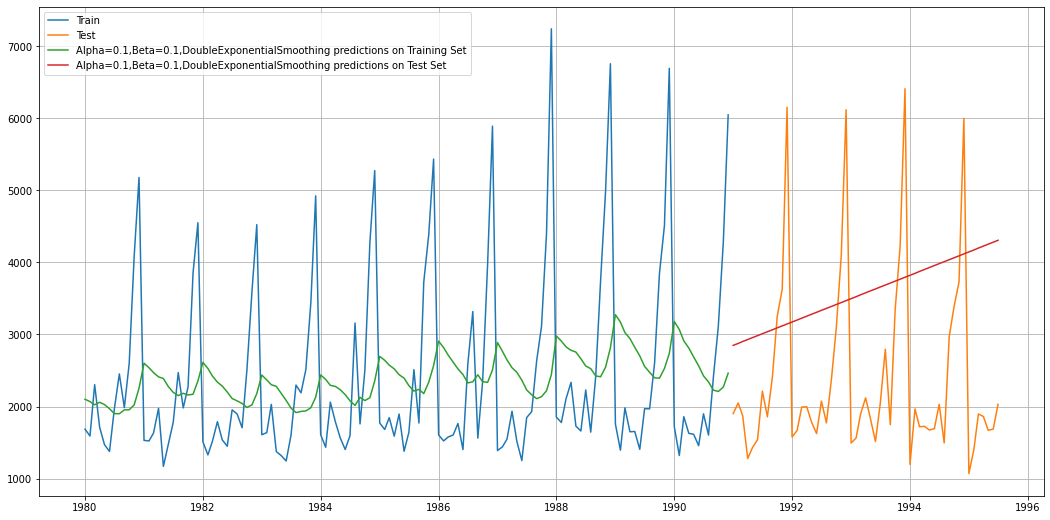

In [222]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling_Sales'], label='Train')
plt.plot(DES_test['Sparkling_Sales'], label='Test')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()

In [224]:
resultsDf_6_2['Test RMSE'][0]

1779.424760295741

In [225]:
resultsDf_6_cons = pd.DataFrame({'Test RMSE': [resultsDf_6_2['Test RMSE'][0]],'Test MAPE':[resultsDf_6_2['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_cons])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                               1389.135175      50.15
NaiveModel                                     3864.279352     152.87
SimpleAverageModel                             1275.081804      38.90
3pointTrailingMovingAverage                    1028.605756      29.73
6pointTrailingMovingAverage                    1283.927428      43.86
9pointTrailingMovingAverage                    1346.278315      46.86
12pointTrailingMovingAverage                   1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing             1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing           1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing           1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing   3850.968926     152.06
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1779.424760      67.23

In [226]:
## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

## Three parameters alpha, beta and gamma are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [228]:
TES_train = sparkling_train.copy()
TES_test = sparkling_test.copy()

In [229]:
TES_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sparkling_Sales  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [231]:
## TES - Auto Fit; we've observed multiplicative seasonal during decomposition

In [232]:
model_TES = ExponentialSmoothing(TES_train['Sparkling_Sales'],trend='additive',seasonal='multiplicative')

In [233]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [234]:
model_TES_autofit.params

{'smoothing_level': 0.15438594424769592,
 'smoothing_slope': 7.4792637216423e-29,
 'smoothing_seasonal': 0.37115483674512467,
 'damping_slope': nan,
 'initial_level': 1639.9991870109961,
 'initial_slope': 4.883435036863843,
 'initial_seasons': array([1.00829357, 0.96886526, 1.24158274, 1.1319156 , 0.93974399,
        0.93802626, 1.22440649, 1.54403137, 1.27317338, 1.63170292,
        2.48236025, 3.11786852]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [235]:
print('%.15f' %7.4792637216423e-29)

0.000000000000000


In [236]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling_Sales  auto_predict
YearMonth                                
1980-01-01             1686   1658.524579
1980-02-01             1591   1602.476973
1980-03-01             2304   2057.336868
1980-04-01             1712   1915.860683
1980-05-01             1471   1569.053682

In [237]:
len(TES_test)

55

In [238]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Sparkling_Sales  auto_predict
YearMonth                                
1991-01-01             1902   1602.258224
1991-02-01             2049   1374.045628
1991-03-01             1874   1807.624541
1991-04-01             1279   1704.829220
1991-05-01             1432   1602.623165

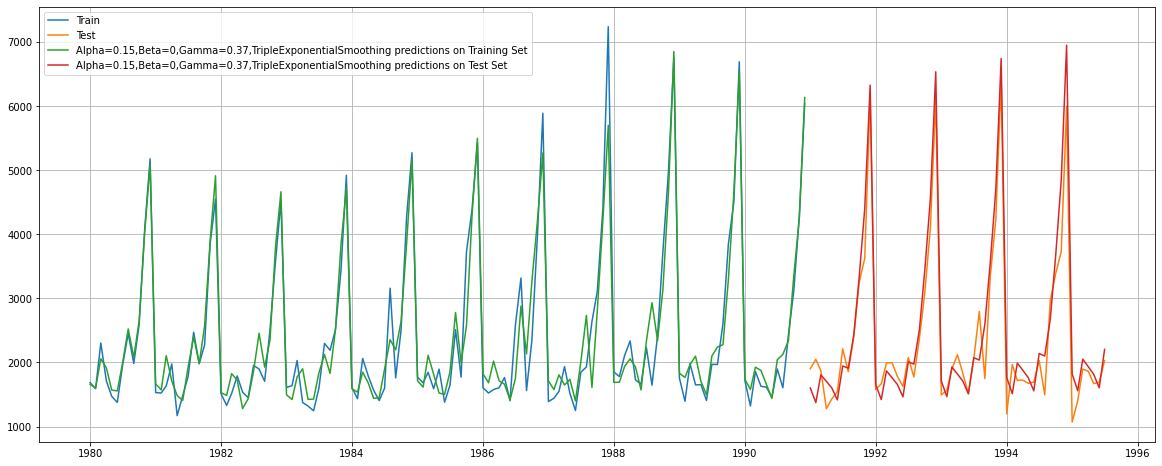

In [239]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(20,8))
plt.plot(TES_train['Sparkling_Sales'], label='Train')
plt.plot(TES_test['Sparkling_Sales'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [240]:
## Training Data

rmse_model7_tes_train_1 = metrics.mean_squared_error(TES_train['Sparkling_Sales'],TES_train['auto_predict'],squared=False)
mape_model7_tes_train_1 = MAPE(TES_train['Sparkling_Sales'],TES_train['auto_predict'])
print("For Alpha: 0.15, Beta: 0 and Gamma: 0.37, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_tes_train_1, mape_model7_tes_train_1))

For Alpha: 0.15, Beta: 0 and Gamma: 0.37, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 353.379 MAPE is 10.18


In [241]:
## Test Data

rmse_model7_tes_test_1 = metrics.mean_squared_error(TES_test['Sparkling_Sales'],TES_test['auto_predict'],squared=False)
mape_model7_tes_test_1 = MAPE(TES_test['Sparkling_Sales'],TES_test['auto_predict'])
print("For Alpha: 0.15, Beta: 0 and Gamma: 0.37, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_tes_test_1, mape_model7_tes_test_1))

For Alpha: 0.15, Beta: 0 and Gamma: 0.37, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 384.159 MAPE is 11.94


In [242]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_tes_test_1],'Test MAPE':[mape_model7_tes_test_1]}
                           ,index=['Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
3pointTrailingMovingAverage                         1028.605756      29.73
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
12pointTrailingMovingAverage                        1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing                  1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        3850.968926     152.06
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424760      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   384.158614      11.94

In [243]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [244]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model7_2_train = metrics.mean_squared_error(TES_train['Sparkling_Sales'],TES_train['predict',i,j,k],squared=False)
            mape_model7_2_train = MAPE(TES_train['Sparkling_Sales'],TES_train['predict',i,j,k])
        
            rmse_model7_2_test = metrics.mean_squared_error(TES_test['Sparkling_Sales'],TES_test['predict',i,j,k],squared=False)
            mape_model7_2_test = MAPE(TES_test['Sparkling_Sales'],TES_test['predict',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model7_2_train
                                      ,'Train MAPE': mape_model7_2_train,'Test RMSE':rmse_model7_2_test
                                      ,'Test MAPE':mape_model7_2_test}, ignore_index=True)
            

In [245]:
resultsDf_7_2

Alpha Values  Beta Values  Gamma Values     Train RMSE  Train MAPE  \
0              0.1          0.0           0.1     388.407846       10.87   
1              0.1          0.0           0.2     371.238514       10.40   
2              0.1          0.0           0.3     362.136353       10.18   
3              0.1          0.0           0.4     358.718206       10.08   
4              0.1          0.0           0.5     359.613055       10.11   
...            ...          ...           ...            ...         ...   
1095           1.0          1.0           0.6  133843.577353     1201.52   
1096           1.0          1.0           0.7   93702.665037     1031.69   
1097           1.0          1.0           0.8  104691.065082     1039.56   
1098           1.0          1.0           0.9  153710.350473     1385.15   
1099           1.0          1.0           1.0  239920.549976     1304.98   

         Test RMSE  Test MAPE  
0     3.444561e+02      11.45  
1     3.073680e+02       9.99  
2     3.039045e+02       9.67  
3     3.132291e+02       9.84  
4     3.247402e+02      10.28  
...            ...        ...  
1095  8.243499e+05   18085.61  
1096  1.397222e+06   25633.70  
1097  3.959306e+06   55483.05  
1098  5.642231e+05    8676.89  
1099  1.211432e+05    3173.70  

[1100 rows x 7 columns]

In [247]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
2             0.1          0.0           0.3  362.136353       10.18   
1             0.1          0.0           0.2  371.238514       10.40   
331           0.4          0.0           0.2  378.201718       10.48   
221           0.3          0.0           0.2  373.296711       10.26   
441           0.5          0.0           0.2  385.672341       10.76   

      Test RMSE  Test MAPE  
2    303.904462       9.67  
1    307.367952       9.99  
331  307.868135       9.42  
221  310.200007       9.81  
441  312.092101       9.50

In [248]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
331           0.4          0.0           0.2  378.201718       10.48   
441           0.5          0.0           0.2  385.672341       10.76   
442           0.5          0.0           0.3  385.454766       10.59   
2             0.1          0.0           0.3  362.136353       10.18   
552           0.6          0.0           0.3  398.546322       11.13   

      Test RMSE  Test MAPE  
331  307.868135       9.42  
441  312.092101       9.50  
442  315.440412       9.64  
2    303.904462       9.67  
552  324.633244       9.71

In [263]:
TES_test['predict', 0.1, 0.0, 0.30000000000000004]

YearMonth
1991-01-01    1618.797078
1991-02-01    1411.716103
1991-03-01    1818.181380
1991-04-01    1719.359781
1991-05-01    1591.715198
1991-06-01    1398.900250
1991-07-01    1925.433405
1991-08-01    1964.207541
1991-09-01    2319.698133
1991-10-01    3204.397274
1991-11-01    4277.548495
1991-12-01    6083.749169
1992-01-01    1618.914596
1992-02-01    1411.818588
1992-03-01    1818.313371
1992-04-01    1719.484597
1992-05-01    1591.830747
1992-06-01    1399.001801
1992-07-01    1925.573178
1992-08-01    1964.350129
1992-09-01    2319.866525
1992-10-01    3204.629887
1992-11-01    4277.859008
1992-12-01    6084.190794
1993-01-01    1619.032114
1993-02-01    1411.921072
1993-03-01    1818.445362
1993-04-01    1719.609413
1993-05-01    1591.946296
1993-06-01    1399.103352
1993-07-01    1925.712951
1993-08-01    1964.492716
1993-09-01    2320.034917
1993-10-01    3204.862500
1993-11-01    4278.169522
1993-12-01    6084.632420
1994-01-01    1619.149632
1994-02-01    1412.023556
19

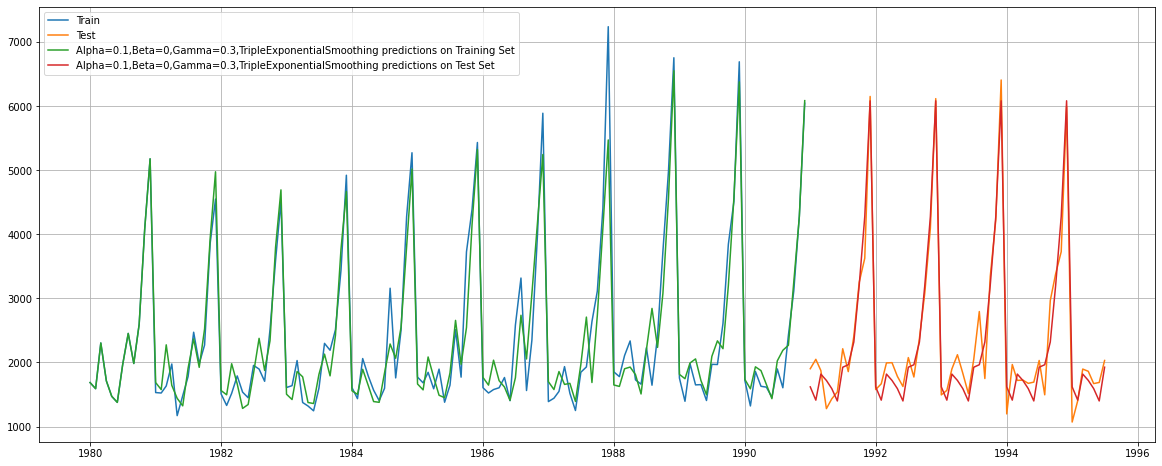

In [265]:
## Plotting on both the Training and Test data using lowest RMSE values of alpha (0.1), beta (0) and gamma (0.3)

plt.figure(figsize=(20,8))
plt.plot(TES_train['Sparkling_Sales'], label='Train')
plt.plot(TES_test['Sparkling_Sales'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.0, 0.30000000000000004], label='Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.0, 0.30000000000000004], label='Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()

In [267]:
resultsDf_7_2['Test RMSE'][2]

303.9044618152052

In [268]:
resultsDf_7_cons = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][2]],'Test MAPE':[resultsDf_7_2['Test MAPE'][2]]}
                           ,index=['Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_cons])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
3pointTrailingMovingAverage                         1028.605756      29.73
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
12pointTrailingMovingAverage                        1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing                  1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        3850.968926     152.06
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424760      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   384.158614      11.94
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   303.904462       9.67

In [271]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']))


Sorted by RMSE values on the Test Data: 
                                                       Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   303.904462       9.67
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   384.158614      11.94
3pointTrailingMovingAverage                         1028.605756      29.73
12pointTrailingMovingAverage                        1267.925330      40.19
SimpleAverageModel                                  1275.081804      38.90
Alpha=0,SimpleExponentialSmoothing                  1275.081813      38.90
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
RegressionOnTime                                    1389.135175      50.15
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.4

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.1, $\beta$ = 0 and $\gamma$ = 0.3.

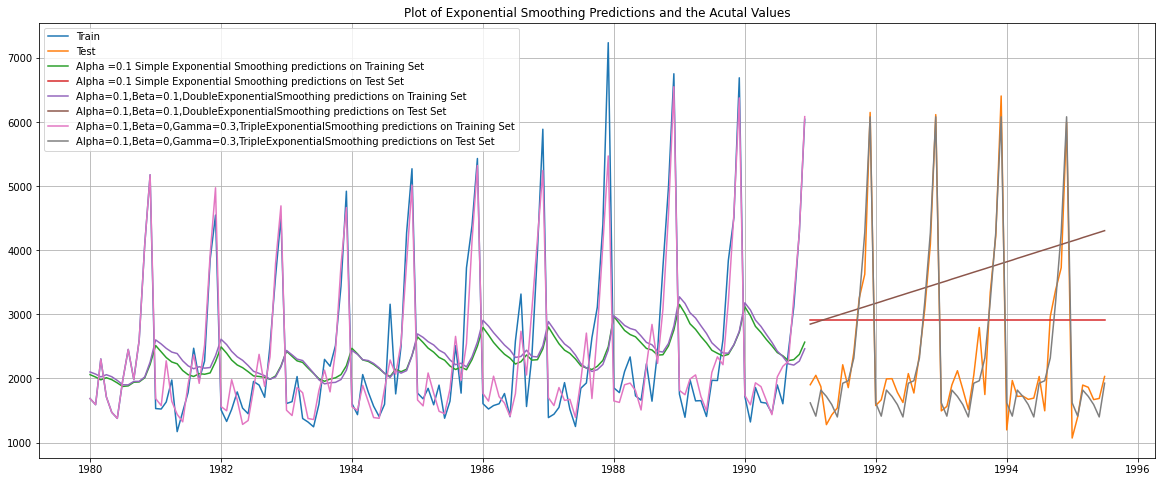

In [273]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(sparkling_train['Sparkling_Sales'], label='Train')
plt.plot(sparkling_test['Sparkling_Sales'], label='Test')

plt.plot(SES_train['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['predict', 0.1, 0.0, 0.30000000000000004], label='Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.0, 0.30000000000000004], label='Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

<h3>5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. <br>If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. <br>Note: Stationarity should be checked at alpha = 0.05.</h3>

In [274]:
## The Augmented Dickey Fuller Test is used to assess whether or not a time series is Stationary

In [275]:
# importing the required library
from statsmodels.tsa.stattools import adfuller

In [276]:
## defining the function to apply the ADF test to the series
def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')


In [277]:
# administering the ADF test on the training data
test_stationarity(sparkling_train)

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



The null hypothesis is that the series is Non-Stationary. <br>
With the resultant ADF test p-value at 0.67, we cannot reject the Null Hypothesis (at alpha 0.05). We hence conclude that the series is non-stationary.

In [278]:
# In order to make the series stationary, we take a 1 period Difference of the original series. 
sparkling_train_d1 = sparkling_train.diff()


In [280]:
sparkling_train_d1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sparkling_Sales  131 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [281]:
# we now administer the ADF test on the differenced series

In [282]:
test_stationarity(sparkling_train_d1.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



The resultant ADF p-value is significantly less than 0.05 (alpha). We can hence reject the null hypothesis for the new series, derived by differencing the original series over 1 period. 

We conclude that at Difference 1, the series is stationary.

In [360]:
print('%1.12f' %2.280104e-12)

0.000000000002


<h3>Question 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</h3>

In [290]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 3
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [291]:
# Creating an empty Dataframe to compare ARIMA/SARIMA AIC scores
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [292]:
# importing the required library for ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [293]:
sparkling_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sparkling_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [294]:
sparkling_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sparkling_Sales  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [295]:
for param in pdq:
    ARIMA_model = ARIMA(sparkling_train['Sparkling_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.7830976852515
ARIMA(0, 1, 3) - AIC:2233.0166051371434
ARIMA(1, 1, 0) - AIC:2268.5280605683624
ARIMA(1, 1, 1) - AIC:2235.0139453504116
ARIMA(1, 1, 2) - AIC:2233.5976471197796
ARIMA(1, 1, 3) - AIC:2234.5741415458515
ARIMA(2, 1, 0) - AIC:2262.0356001527553
ARIMA(2, 1, 1) - AIC:2232.360489879201
ARIMA(2, 1, 2) - AIC:2210.6177078582477
ARIMA(2, 1, 3) - AIC:2229.3580937724146
ARIMA(3, 1, 0) - AIC:2259.4715547784995
ARIMA(3, 1, 1) - AIC:2233.9217542714655
ARIMA(3, 1, 2) - AIC:2228.927225437232
ARIMA(3, 1, 3) - AIC:2225.661558525662


In [296]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2210.617708
15  (3, 1, 3)  2225.661559
14  (3, 1, 2)  2228.927225
11  (2, 1, 3)  2229.358094
9   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
6   (1, 1, 2)  2233.597647
13  (3, 1, 1)  2233.921754
7   (1, 1, 3)  2234.574142
5   (1, 1, 1)  2235.013945
12  (3, 1, 0)  2259.471555
8   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906437
4   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [297]:
arima_mod = ARIMA(sparkling_train['Sparkling_Sales'], order=(2,1,2),freq='MS')

results_Arima = arima_mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.Sparkling_Sales   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.446
Date:                Wed, 12 Aug 2020   AIC                           2210.618
Time:                        14:32:11   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.5856      0.517     10.814      0.000       4.573       6.598
ar.L1.D.Sparkling_Sales     1.2699      0.074     17.046      0.000       1.124       1.416


In [298]:
## Predict on the Test Set using this model and evaluate the model.

In [300]:
arima_predicted = results_Arima.forecast(steps=len(sparkling_test))

In [306]:
arima_predicted[0]

array([4246.17336707, 2817.43750884, 2013.45987146, 1794.43357214,
       1968.27225175, 2313.34292743, 2655.79281626, 2898.99642064,
       3017.6347607 , 3033.68134265, 2989.22322933, 2925.39820102,
       2870.8716334 , 2839.00188979, 2830.69548638, 2839.6207277 ,
       2857.2291646 , 2876.21187299, 2892.07575499, 2903.20920578,
       2910.08251579, 2914.19567341, 2917.19008102, 2920.30992273,
       2924.21573819, 2929.04940175, 2934.62106927, 2940.61018377,
       2946.71601237, 2952.73621768, 2958.58231043, 2964.25525994,
       2969.80586575, 2975.29809544, 2980.78472564, 2986.29694529,
       2991.84479772, 2997.42356609, 3003.02163454, 3008.62689422,
       3014.23047486, 3019.82789501, 3025.41843246, 3031.00368042,
       3036.58606668, 3042.16778184, 3047.75024779, 3053.3340431 ,
       3058.91910601, 3064.50503397, 3070.09135043, 3075.67767564,
       3081.26379437, 3086.84964596, 3092.435274  ])

In [307]:
rmse_arima_1 = metrics.mean_squared_error(sparkling_test['Sparkling_Sales'],arima_predicted[0],squared=False)
print(rmse_arima_1)

1374.7611153419903


In [309]:
mape_arima_1 = MAPE(sparkling_test['Sparkling_Sales'], arima_predicted[0])
print("For ARIMA (2,1,2) Model forecast on the Test Data,  MAPE is %3.2f" %mape_arima_1)

For ARIMA (2,1,2) Model forecast on the Test Data,  MAPE is 48.37


In [310]:
resultsDf_arima_1 = pd.DataFrame({'Test RMSE': [rmse_arima_1], 'Test MAPE': [mape_arima_1]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_arima_1

Test RMSE  Test MAPE
ARIMA(2,1,2)  1374.761115      48.37

In [311]:
pre_arima_resultsDf = resultsDf.copy()

In [314]:
resultsDf = pd.concat([resultsDf, resultsDf_arima_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
3pointTrailingMovingAverage                         1028.605756      29.73
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
12pointTrailingMovingAverage                        1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing                  1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        3850.968926     152.06
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424760      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   384.158614      11.94
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   303.904462       9.67
ARIMA(2,1,2)                                        1374.761115      48.37

In [316]:
## SARIMA model, for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [317]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [318]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [319]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(sparkling_train['Sparkling_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684412
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023832
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334677986
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574255847
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389758
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791546
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908190414
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307638
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158604958
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920767
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866585
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.9911553672691
SARIMA(0, 1, 

SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.214093117696
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005743770386
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404035210788
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644412314
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200892466104
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.0972420012758
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.227544745203
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476027068771
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1560.451669661751
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.7756339991752
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1401.183216121307
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1387.627784614595


In [320]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

param       seasonal          AIC
95   (1, 1, 2)  (0, 1, 2, 12)  1382.347780
41   (0, 1, 2)  (0, 1, 2, 12)  1382.484254
101  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
149  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
47   (0, 1, 2)  (1, 1, 2, 12)  1384.398867
107  (1, 1, 2)  (2, 1, 2, 12)  1385.688721
53   (0, 1, 2)  (2, 1, 2, 12)  1386.023734
155  (2, 1, 2)  (1, 1, 2, 12)  1386.097242
161  (2, 1, 2)  (2, 1, 2, 12)  1387.627785
77   (1, 1, 1)  (0, 1, 2, 12)  1398.756167

Of the options tested, the SARIMA model with the lowest AIC is SARIMA(1,1,2)(0,1,2,12)

In [322]:
# building a SARIMA model with the paramaters above
import statsmodels.api as sm

sarima_mod = sm.tsa.statespace.SARIMAX(sparkling_train['Sparkling_Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = sarima_mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Wed, 12 Aug 2020   AIC                           1382.348
Time:                                    15:02:14   BIC                           1397.479
Sample:                                         0   HQIC                          1388.455
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

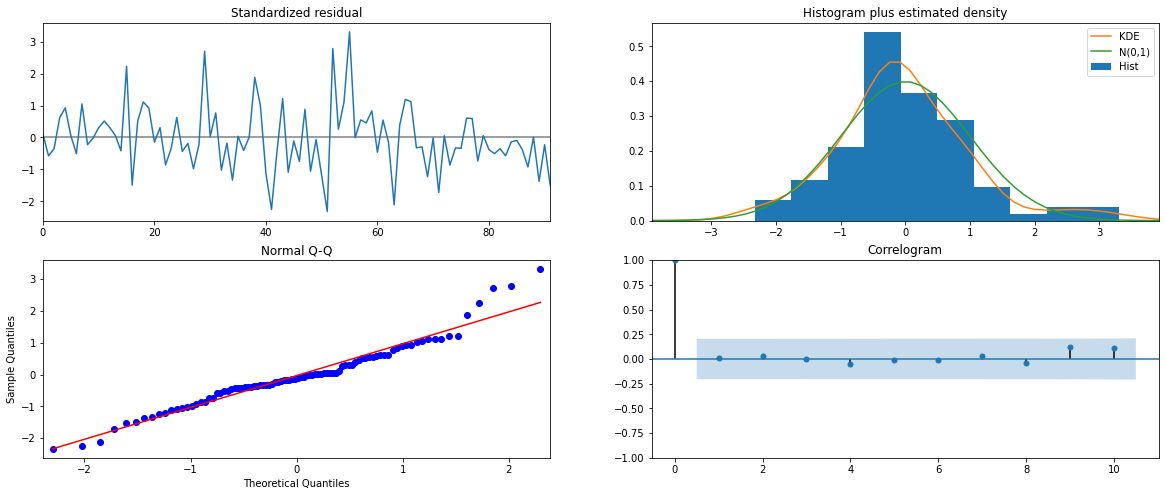

In [324]:
results_SARIMA.plot_diagnostics(figsize=(20, 8))
plt.show()

In [325]:
## Predicting on the Test Set using this model and evaluating the model.

In [326]:
sarima_pred = results_SARIMA.get_forecast(steps=len(sparkling_test))

In [328]:
sarima_pred.predicted_mean

array([1460.24462974, 1392.43716687, 1743.20170007, 1650.06692968,
       1522.65602668, 1365.34219495, 1854.39912956, 1664.79782933,
       2343.55429191, 3223.02197573, 4306.22504244, 6199.41813251,
       1469.49080677, 1302.52927682, 1707.87037811, 1586.39065767,
       1472.25064726, 1303.70589457, 1801.97609548, 1616.35567304,
       2288.01962274, 3179.40060565, 4256.18088188, 6158.41559964,
       1418.87073746, 1244.81718204, 1654.06367414, 1530.4333583 ,
       1417.47762388, 1248.28072173, 1746.9100441 , 1561.09186297,
       2232.86471315, 3124.18572745, 4200.9990268 , 6103.2155596 ,
       1363.6807114 , 1189.62164154, 1598.8711703 , 1475.23918225,
       1362.28436867, 1193.08695944, 1691.71656105, 1505.89822615,
       2177.671161  , 3068.99212867, 4145.80545371, 6048.02197236,
       1308.48713195, 1134.42805781, 1543.67758892, 1420.04559958,
       1307.09078671, 1137.89337709, 1636.52297891])

In [329]:
sarima_pred.summary_frame(alpha=0.05)

y          mean     mean_se  mean_ci_lower  mean_ci_upper
0   1460.244630  412.922801     650.930811    2269.558449
1   1392.437167  429.721334     550.198830    2234.675504
2   1743.201700  430.065899     900.288027    2586.115373
3   1650.066930  433.930061     799.579639    2500.554221
4   1522.656027  434.242948     671.555489    2373.756564
5   1365.342195  436.010878     510.776577    2219.907813
6   1854.399130  436.827670     998.232629    2710.565630
7   1664.797829  438.117773     806.102773    2523.492886
8   2343.554292  439.130041    1482.875228    3204.233356
9   3223.021976  440.286514    2360.076265    4085.967687
10  4306.225042  441.358258    3441.178753    5171.271332
11  6199.418133  442.471923    5332.189098    7066.647167
12  1469.490807  521.605054     447.163687    2491.817927
13  1302.529277  531.458107     260.890527    2344.168027
14  1707.870378  531.868432     665.427407    2750.313350
15  1586.390658  535.883640     536.078024    2636.703291
16  1472.250647  537.443950     418.879861    2525.621434
17  1303.705895  540.194602     244.943930    2362.467859
18  1801.976095  542.235279     739.214478    2864.737713
19  1616.355673  544.637682     548.885432    2683.825914
20  2288.019623  546.823245    1216.265756    3359.773489
21  3179.400606  549.112118    2103.160632    4255.640579
22  4256.180882  551.329720    3175.594487    5336.767277
23  6158.415600  553.572221    5073.433983    7243.397216
24  1418.870737  621.912410     199.944811    2637.796663
25  1244.817182  632.834748       4.483869    2485.150495
26  1654.063674  634.089490     411.271111    2896.856237
27  1530.433358  639.418324     277.196472    2783.670244
28  1417.477624  642.131889     158.922249    2676.032999
29  1248.280722  646.140388     -18.131167    2514.692611
30  1746.910044  649.377882     474.152783    3019.667305
31  1561.091863  652.998810     281.237713    2840.946013
32  2232.864713  656.378137     946.387205    3519.342221
33  3124.185727  659.860722    1830.882478    4417.488976
34  4200.999027  663.258718    2901.035828    5500.962226
35  6103.215560  666.675652    4796.555293    7409.875827
36  1363.680711  731.507239     -70.047132    2797.408555
37  1189.621642  743.806902    -268.213098    2647.456381
38  1598.871170  746.027068     136.684986    3061.057354
39  1475.239182  752.701953      -0.029538    2950.507902
40  1362.284369  756.590789    -120.606329    2845.175066
41  1193.086959  761.866256    -300.143462    2686.317381
42  1691.716561  766.309703     189.777141    3193.655981
43  1505.898226  771.155236      -5.538263    3017.334715
44  2177.671161  775.734042     657.260377    3698.081945
45  3068.992129  780.414713    1539.407398    4598.576860
46  4145.805454  784.996791    2607.240016    5684.370892
47  6048.021972  789.590922    4500.452202    7595.591742
48  1308.487132  851.489434    -360.401492    2977.375756
49  1134.428058  865.011012    -560.962372    2829.818488
50  1543.677589  868.269572    -158.099501    3245.454679
51  1420.045600  876.205405    -297.285437    3137.376636
52  1307.090787  881.260164    -420.147395    3034.328969
53  1137.893377  887.749397    -602.063468    2877.850222
54  1636.522979  893.368835    -114.447764    3387.493721

In [330]:
rmse_sarima_1 = metrics.mean_squared_error(sparkling_test['Sparkling_Sales'], sarima_pred.predicted_mean,squared=False)
print(rmse_sarima_1)

382.5767225894773


In [331]:
mape_sarima_1 = MAPE(sparkling_test['Sparkling_Sales'], sarima_pred.predicted_mean)
print("For SARIMA (1,1,2)(0,1,2,12) Model forecast on the Test Data,  MAPE is %3.2f" %mape_sarima_1)

For SARIMA (1,1,2)(0,1,2,12) Model forecast on the Test Data,  MAPE is 12.87


In [332]:
resultsDf_sarima_1 = pd.DataFrame({'Test RMSE': [rmse_sarima_1], 'Test MAPE': [mape_sarima_1]}
                           ,index=['SARIMA(1,1,2)(0,1,2,12)'])

resultsDf_sarima_1

Test RMSE  Test MAPE
SARIMA(1,1,2)(0,1,2,12)  382.576723      12.87

In [333]:
resultsDf = pd.concat([resultsDf, resultsDf_sarima_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
3pointTrailingMovingAverage                         1028.605756      29.73
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
12pointTrailingMovingAverage                        1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing                  1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        3850.968926     152.06
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424760      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   384.158614      11.94
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   303.904462       9.67
ARIMA(2,1,2)                                        1374.761115      48.37
SARIMA(1,1,2)(0,1,2,12)                              382.576723      12.87

<h3>7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.</h3>

In [339]:
## SARIMA with ACF and PACF values

In [338]:
# importing the required libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

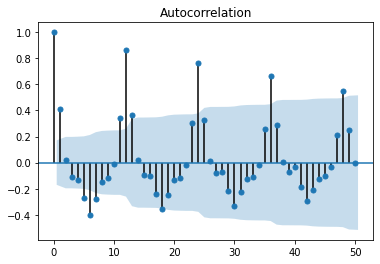

In [342]:
# ACF plot before Differencing
plot_acf(sparkling_train,lags=50)
plt.show()

We know that the original series is not Stationary. Hence we apply Difference over 1 period, and then plot the ACF on the new series. 

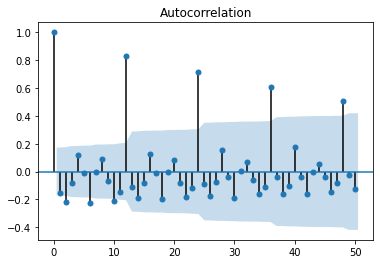

In [343]:
plot_acf(sparkling_train.diff().dropna(),lags=50)
plt.show()

The cut-off appears right after 0. We see that lag 1 is marginally insignificant. The first significant point is at lag 2. <br>
Hence a possible value of q is 2. 

In [346]:
## plotting the PACF

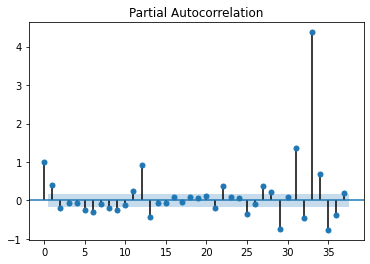

In [347]:
# PACF plot before Differencing
plot_pacf(sparkling_train,lags=37)
plt.show()

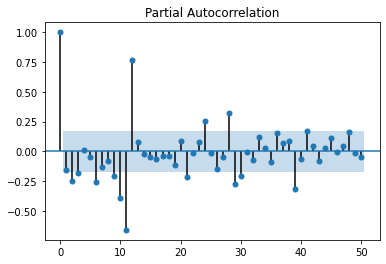

In [348]:
## PACF plot after Differencing the original series over 1 period
plot_pacf(sparkling_train.diff().dropna(),lags=50)
plt.show()

The cut-off is right after 0. We see that lag 1 is insignificant. The first significant point is at lag 2. 3 can also be considered significant, though it is on the border<br>
Hence a possible value of p is 3.

Based on the ACF and PACF plots, we can assign the following values:<br>
p = 3 (based on the PACF plot)<br>
d = 1 (first order of differencing)<br>
q = 2 (based on the ACF plot)<br>
We can assign 1 to both P and Q - to factor the month to month seasonal effect.<br>

In [374]:
mod_SAP1 = sm.tsa.statespace.SARIMAX(sparkling_train['Sparkling_Sales'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_SAP1 = mod_SAP1.fit(maxiter=1000)
print(results_SARIMA_SAP1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -771.843
Date:                              Fri, 14 Aug 2020   AIC                           1559.686
Time:                                      19:38:16   BIC                           1580.841
Sample:                                           0   HQIC                          1568.257
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5251      0.293     -1.791      0.073      -1.099       0.049
ar.L2          0.03

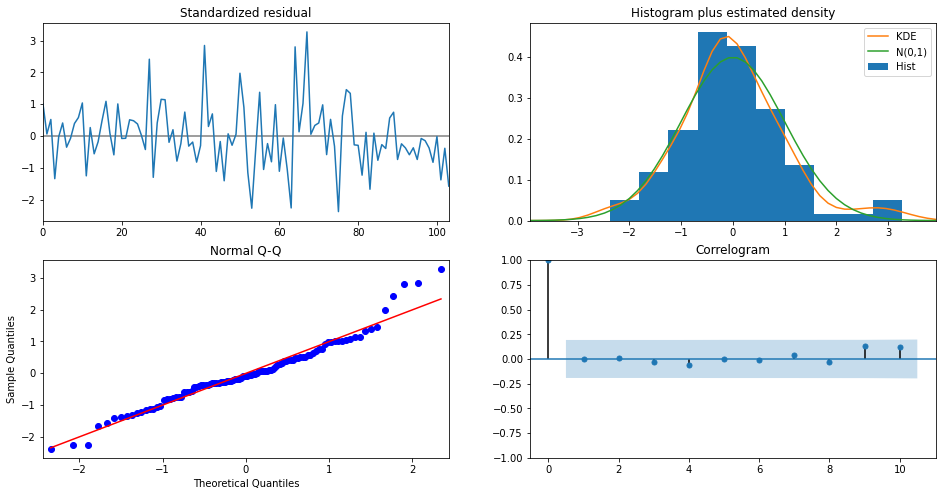

In [375]:
results_SARIMA_SAP1.plot_diagnostics(figsize=(16, 8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [376]:
pred_SAP1 = results_SARIMA_SAP1.get_forecast(steps=len(sparkling_test))
pred_SAP1.predicted_mean

array([1448.39474988, 1359.13173478, 1727.91014134, 1650.7692309 ,
       1521.97507406, 1353.90354653, 1860.4688604 , 1661.50569346,
       2370.64077284, 3298.17204976, 4331.23091931, 6261.30433361,
       1479.88624608, 1267.02396357, 1705.49057386, 1570.78095861,
       1472.10506837, 1299.47651915, 1798.63684668, 1588.11725184,
       2310.53605495, 3208.5784302 , 4258.82189383, 6167.49501214,
       1409.28241152, 1212.11467557, 1641.73713711, 1514.33458253,
       1411.83575806, 1239.78502313, 1739.88615871, 1530.83448145,
       2251.56591893, 3153.35399784, 4201.41466411, 6112.80603259,
       1351.64589877, 1152.48466255, 1583.23049687, 1454.89980854,
       1352.88656844, 1180.76244014, 1680.7440756 , 1471.50594542,
       2192.4517098 , 3093.76401449, 4142.10193674, 6053.14803675,
       1292.36229462, 1093.45427011, 1524.05741514, 1395.84461711,
       1293.76969873, 1121.65489276, 1621.65170697])

In [377]:
pred_SAP1.summary_frame(alpha=0.05)

y          mean     mean_se  mean_ci_lower  mean_ci_upper
0   1448.394750  403.807849     656.945909    2239.843590
1   1359.131735  418.089959     539.690473    2178.572996
2   1727.910141  418.089951     908.468895    2547.351388
3   1650.769231  425.049646     817.687234    2483.851228
4   1521.975074  425.196287     688.605665    2355.344483
5   1353.903547  427.088735     516.825008    2190.982085
6   1860.468860  428.028411    1021.548591    2699.389130
7   1661.505693  429.130063     820.426225    2502.585162
8   2370.640773  430.263188    1527.340421    3213.941124
9   3298.172050  431.319664    2452.801043    4143.543056
10  4331.230919  432.425409    3483.692691    5178.769147
11  6261.304334  433.501038    5411.657912    7110.950755
12  1479.886246  495.896249     507.947458    2451.825035
13  1267.023964  503.472431     280.236133    2253.811795
14  1705.490574  504.406366     716.872262    2694.108886
15  1570.780959  509.309929     572.551840    2569.010077
16  1472.105068  510.612019     471.323901    2472.886236
17  1299.476519  513.206160     293.610928    2305.342110
18  1798.636847  515.209095     788.845576    2808.428117
19  1588.117252  517.314604     574.199259    2602.035245
20  2310.536055  519.433893    1292.464332    3328.607778
21  3208.578430  521.496403    2186.464263    4230.692597
22  4258.821894  523.584748    3232.614644    5285.029144
23  6167.495012  525.647010    5137.245803    7197.744221
24  1409.282412  596.200006     240.751872    2577.812951
25  1212.114676  606.182549      24.018711    2400.210640
26  1641.737137  607.973502     450.130969    2833.343305
27  1514.334583  614.762412     309.422396    2719.246769
28  1411.835758  617.048486     202.442948    2621.228568
29  1239.785023  620.997708      22.651882    2456.918165
30  1739.886159  624.190720     516.494828    2963.277489
31  1530.834481  627.508235     300.940942    2760.728021
32  2251.565919  630.836655    1015.148795    3487.983043
33  3153.353998  634.086448    1910.567396    4396.140599
34  4201.414664  637.362754    2952.206622    5450.622706
35  6112.806033  640.599773    4857.253549    7368.358516
36  1351.645899  705.688898     -31.478926    2734.770724
37  1152.484663  716.942103    -252.696038    2557.665363
38  1583.230497  719.832153     172.385402    2994.075592
39  1454.899809  727.937397      28.168728    2881.630889
40  1352.886568  731.371159     -80.574562    2786.347699
41  1180.762440  736.577397    -262.902729    2624.427609
42  1680.744076  740.978860     228.452198    3133.035954
43  1471.505945  745.503470      10.345995    2932.665896
44  2192.451710  750.030715     722.418522    3662.484898
45  3093.764014  754.466246    1615.037345    4572.490684
46  4142.101937  758.921306    2654.643510    5629.560363
47  6053.148037  763.326621    4557.055351    7549.240723
48  1292.362295  825.382914    -325.358491    2910.083080
49  1093.454270  837.885477    -548.771087    2735.679627
50  1524.057415  841.889387    -126.015462    3174.130293
51  1395.844617  851.261902    -272.598052    3064.287287
52  1293.769699  855.836495    -383.639009    2971.178406
53  1121.654893  862.257413    -568.338581    2811.648367
54  1621.651707  867.836106     -79.275806    3322.579220

In [378]:
rmse_SAP1 = metrics.mean_squared_error(sparkling_test['Sparkling_Sales'],pred_SAP1.predicted_mean,squared=False)
print(rmse_SAP1)

393.09989743794586


In [379]:
mape_SAP1 = MAPE(sparkling_test['Sparkling_Sales'], pred_SAP1.predicted_mean)
print("For SARIMA (3,1,2)(0,1,1,12) Model forecast on the Test Data,  MAPE is %3.2f" %mape_SAP1)

For SARIMA (3,1,2)(0,1,1,12) Model forecast on the Test Data,  MAPE is 13.27


In [380]:
resultsDf_sarima_2 = pd.DataFrame({'Test RMSE': [rmse_SAP1], 'Test MAPE': [mape_SAP1]}
                           ,index=['SARIMA(3,1,2)(1,1,1,12)'])

resultsDf_sarima_2

Test RMSE  Test MAPE
SARIMA(3,1,2)(1,1,1,12)  393.099897      13.27

In [381]:
resultsDf = pd.concat([resultsDf, resultsDf_sarima_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
3pointTrailingMovingAverage                         1028.605756      29.73
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
12pointTrailingMovingAverage                        1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing                  1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        3850.968926     152.06
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424760      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   384.158614      11.94
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   303.904462       9.67
ARIMA(2,1,2)                                        1374.761115      48.37
SARIMA(1,1,2)(0,1,2,12)                              382.576723      12.87
SARIMA(3,1,2)(1,1,1,12)                              393.099897      13.27

<h3>Question 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</h3>

In [382]:
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
3pointTrailingMovingAverage                         1028.605756      29.73
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
12pointTrailingMovingAverage                        1267.925330      40.19
Alpha=0,SimpleExponentialSmoothing                  1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        3850.968926     152.06
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424760      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   384.158614      11.94
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   303.904462       9.67
ARIMA(2,1,2)                                        1374.761115      48.37
SARIMA(1,1,2)(0,1,2,12)                              382.576723      12.87
SARIMA(3,1,2)(1,1,1,12)                              393.099897      13.27

In [383]:
## let's sort the models by the Test RMSE scores, from the lowest to the highest
resultsDf.sort_values(by='Test RMSE')

Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   303.904462       9.67
SARIMA(1,1,2)(0,1,2,12)                              382.576723      12.87
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   384.158614      11.94
SARIMA(3,1,2)(1,1,1,12)                              393.099897      13.27
3pointTrailingMovingAverage                         1028.605756      29.73
12pointTrailingMovingAverage                        1267.925330      40.19
SimpleAverageModel                                  1275.081804      38.90
Alpha=0,SimpleExponentialSmoothing                  1275.081813      38.90
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
ARIMA(2,1,2)                                        1374.761115      48.37
Alpha=0.1,SimpleExponentialSmoothing                1375.393526      49.53
RegressionOnTime                                    1389.135175      50.15
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424760      67.23
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        3850.968926     152.06
NaiveModel                                          3864.279352     152.87

Based on the Test RMSE scores, the model that performs best on the Test data is: Triple Exponential Smoothing Model (alpha=0.1, beta = 0, gamma = 0.3). The model that performs second best is SARIMAX (1,1,2)x(0,1,2,12). 

<h3>Question 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</h3>

Building a Triple Exponential Smoothing (alpha = 0.1, beta = 0, gamma = 0.3) model on the complete data, and forecasting for the next 12 months

In [393]:
TES_data = sparkling_data.copy()

In [394]:
TES_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sparkling_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [395]:
model_TES_best = ExponentialSmoothing(TES_data['Sparkling_Sales'],trend='additive',seasonal='multiplicative')

In [396]:
TES_best = model_TES_best.fit(smoothing_level=0.1,smoothing_slope=0.0,smoothing_seasonal=0.3,optimized=True,use_brute=True)

In [397]:
print(TES_best.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       23177578.963
Optimized:                         True   AIC                           2225.059
Trend:                         Additive   BIC                           2276.757
Seasonal:                Multiplicative   AICC                          2229.130
Seasonal Periods:                    12   Date:                 Fri, 14 Aug 2020
Box-Cox:                          False   Time:                         20:47:45
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_slope          

In [398]:
## Forecast
TES_best_forecast = TES_best.forecast(steps=12)

In [400]:
TES_best_forecast

1995-08-01    1923.569548
1995-09-01    2388.275735
1995-10-01    3209.004743
1995-11-01    3932.152285
1995-12-01    6049.534727
1996-01-01    1350.823521
1996-02-01    1624.617929
1996-03-01    1861.078429
1996-04-01    1824.834459
1996-05-01    1671.371518
1996-06-01    1590.584542
1996-07-01    1998.549369
Freq: MS, dtype: float64

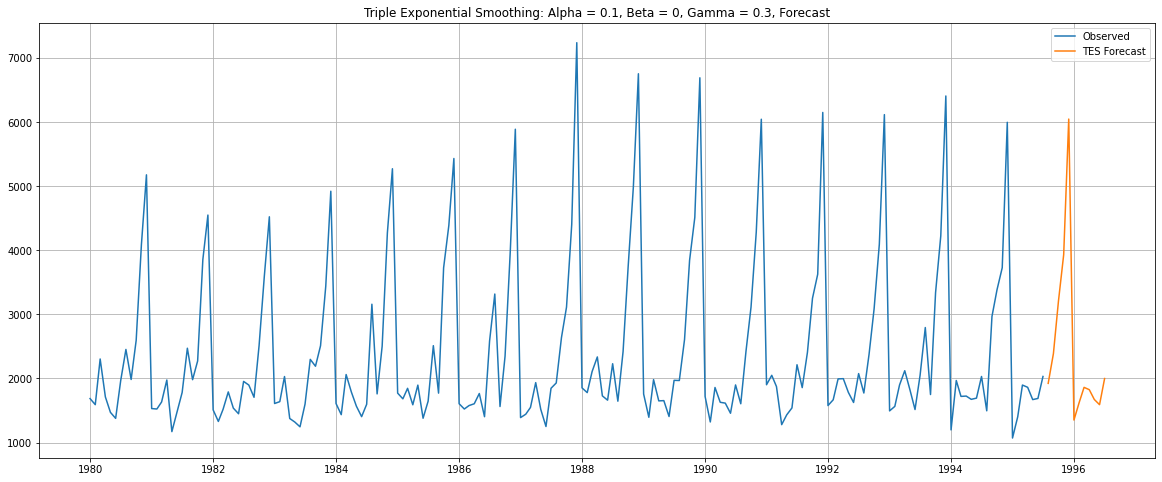

In [408]:
## Plotting on observed data and the forecast

plt.figure(figsize=(20,8))
plt.plot(TES_data['Sparkling_Sales'], label='Observed')

plt.plot(TES_best_forecast, label='TES Forecast')

plt.title('Triple Exponential Smoothing: Alpha = 0.1, Beta = 0, Gamma = 0.3, Forecast')
plt.legend(loc='best')
plt.grid();

Building a SARIMAX (1,1,2)x(0,1,2,12) model on the complete data, and forecasting for the next 12 months

In [409]:
full_mod = sm.tsa.statespace.SARIMAX(sparkling_data['Sparkling_Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_SARIMA_7 = full_mod.fit(maxiter=1000)
print(results_SARIMA_7.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1086.537
Date:                            Fri, 14 Aug 2020   AIC                           2185.074
Time:                                    21:04:10   BIC                           2203.017
Sample:                                         0   HQIC                          2192.364
                                            - 187                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5604      0.367     -1.528      0.127      -1.279       0.159
ma.L1         -0.2809      0.339   

In [410]:
pred_full_SARIMA = results_SARIMA_7.get_forecast(steps=12)

In [411]:
pred_full_SARIMA_date = pd.DataFrame(pred_full_SARIMA.summary_frame())
pred_full_SARIMA_date.head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1869.770067  389.241605    1106.870539    2632.669594
1  2484.479875  394.108109    1712.042176    3256.917575
2  3294.052682  394.223309    2521.389194    4066.716169
3  3932.866644  395.394534    3157.907597    4707.825691
4  6131.680558  395.475843    5356.562149    6906.798966

In [412]:
pred_full_SARIMA_date = pred_full_SARIMA_date.set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))

In [413]:
pred_full_SARIMA_date

y                  mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1869.770067  389.241605    1106.870539    2632.669594
1995-09-01  2484.479875  394.108109    1712.042176    3256.917575
1995-10-01  3294.052682  394.223309    2521.389194    4066.716169
1995-11-01  3932.866644  395.394534    3157.907597    4707.825691
1995-12-01  6131.680558  395.475843    5356.562149    6906.798966
1996-01-01  1245.188368  396.010406     469.022235    2021.354502
1996-02-01  1580.094096  396.241732     803.474572    2356.713619
1996-03-01  1837.506030  396.627060    1060.131278    2614.880783
1996-04-01  1818.652204  396.920827    1040.701677    2596.602730
1996-05-01  1664.131274  397.263937     885.508265    2442.754284
1996-06-01  1615.681123  397.578529     836.441526    2394.920721
1996-07-01  2016.793480  397.908527    1236.907098    2796.679862

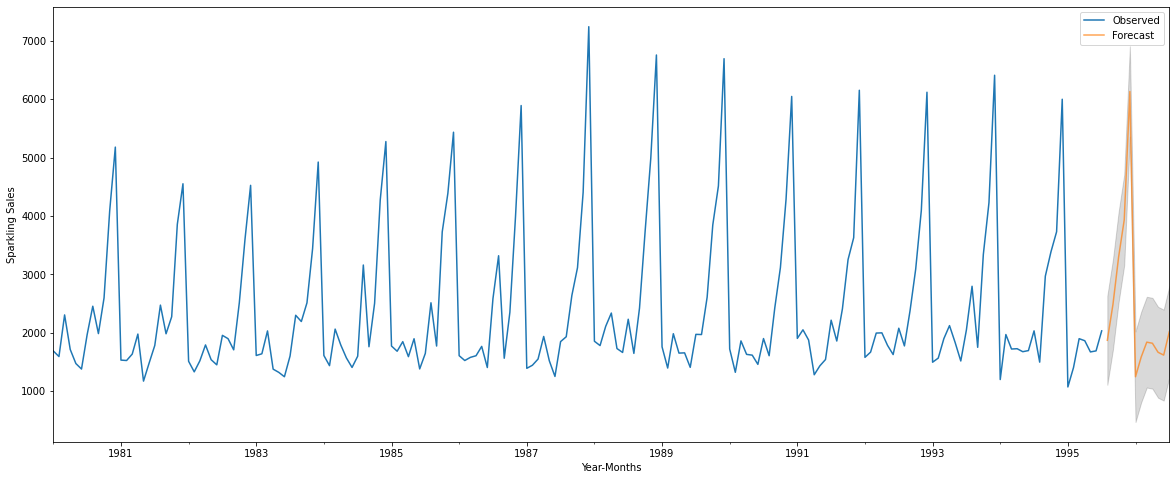

In [415]:
# plot the forecast along with the confidence band
plt.figure(figsize=(20,8))
axis = sparkling_data['Sparkling_Sales'].plot(label='Observed')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()